# Project Title: Adult Census Income Prediction

**Problem Statement:** The Goal is to predict whether a person has an income of more than 50K a year or not.
This is basically a binary classification problem where a person is classified into the >50K group or <=50K group.

In [1]:
import numpy as np
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

In [46]:
db=pd.read_csv('adult.csv')
db

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- age: the age of an individual.Integer greater than 0
- workclass: a general term to represent the employment status of an individual. Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: this is the number of people the census believes the entry represents. Integer greater than 0
- education: the highest level of education achieved by an individual. Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: the highest level of education achieved in numerical form. Integer greater than 0
- marital-status: marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: the general type of occupation of an individual. Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status. We might not make use of this attribute at all Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: Descriptions of an individual’s race White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: the biological sex of the individual. Male, female
- capital-gain: capital gains for an individual. Integer greater than or equal to 0
- capital-loss: capital loss for an individual. Integer greater than or equal to 0
- hours-per-week: the hours an individual has reported to work per week. continuous
- native-country: country of origin for an individual. United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: whether or not an individual makes more than $50,000 annually. <= 50K, >50K

In [4]:
censusdb=db.copy()

# Data Cleaning and Processing of categorical data

workclass feature

In [5]:
columns=['workclass','education','marital-status','occupation','relationship','race','sex','country']

for col in columns:
    print('Column:',col,'\n')
    print(censusdb[col].value_counts(),'\n')

Column: workclass 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

Column: education 

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64 

Column: marital-status 

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64 


    workclass, occupation, country columns has a ? mark in some of the entry, Replacing the ? mark with NaN values.

In [6]:
censusdb['workclass']=censusdb['workclass'].replace(to_replace=' ?',value=np.NaN)
censusdb['occupation']=censusdb['occupation'].replace(to_replace=' ?',value=np.NaN)
censusdb['country']=censusdb['country'].replace(to_replace=' ?',value=np.NaN)

In [7]:
censusdb.dropna(axis=0,how='any',inplace=True)

In [8]:
censusdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  country         30162 non-null  object
 14  salary          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
def removeemptyspace(data):
    columns=['workclass','education','marital-status','occupation','relationship','race','sex','country']
    
    for col in columns:
        data[col]=data[col].apply(lambda x:re.findall('\S+',x)[0].capitalize())
        
    return data

In [10]:
censusdb=removeemptyspace(censusdb)

In [11]:
censusdb.groupby('education-num')['education'].value_counts()

education-num  education   
1              Preschool         45
2              1st-4th          151
3              5th-6th          288
4              7th-8th          557
5              9th              455
6              10th             820
7              11th            1048
8              12th             377
9              Hs-grad         9840
10             Some-college    6678
11             Assoc-voc       1307
12             Assoc-acdm      1008
13             Bachelors       5044
14             Masters         1627
15             Prof-school      542
16             Doctorate        375
Name: education, dtype: int64

education-num is a unique number associated wuth different education a particular individual has .

In [12]:
censusdb['education'].unique()

array(['Bachelors', 'Hs-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school',
       '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object)

The education column has different classes available, but some of the classes can be put under a same category, this will reduce the number of classes for us during visualization purpose.

In [13]:
education={'Preschool':'Preschool','1st-4th':'School-Dropout','5th-6th':'School-Dropout','7th-8th':'School-Dropout','9th':'School-Dropout',
  '10th':'10th','11th':'HS-dropout','12th':'HS-grad','Hs-grad':'HS-grad','Some-college':'Collge-droput','Assoc-acdm':'Associates',
  'Assoc-voc':'Associates','Bachelors':'Bachelors','Masters':'Masters','Prof-school':'Prof-school','Doctorate':'Doctorate'}

In [14]:
censusdb.replace({'education':education},inplace=True)
#df.replace({"col1": di})

In [15]:
censusdb['education'].value_counts()

HS-grad           10217
Collge-droput      6678
Bachelors          5044
Associates         2315
Masters            1627
School-Dropout     1451
HS-dropout         1048
10th                820
Prof-school         542
Doctorate           375
Preschool            45
Name: education, dtype: int64

In [16]:
def agegroup(x):
    if x in range(17,25):
        return '17-24'
    
    elif x in range(25,35):
        return '25-34'
    
    elif x in range(35,45):
        return '35-45'
    
    elif x in range(45-55):
        return '45-54'
    
    elif x in range(55-61):
        return '55-60'
    else:
        return '60+'
    
    
    
def hours_category(x):
    
    if x in range(36):
        return 'Part-time'
    
    elif x in range(36,55):
        return 'Full-time'
    
    else:
        return 'Over-time'

In [17]:
censusdb['Age-Group']=censusdb['age'].apply(agegroup)
censusdb['Hour-Category']=censusdb['hours-per-week'].apply(hours_category)

In [18]:
censusdb

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,Age-Group,Hour-Category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-states,<=50K,35-45,Full-time
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-states,<=50K,60+,Part-time
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-states,<=50K,35-45,Full-time
3,53,Private,234721,HS-dropout,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-states,<=50K,60+,Full-time
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,25-34,Full-time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Associates,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-states,<=50K,25-34,Full-time
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-states,>50K,35-45,Full-time
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-states,<=50K,60+,Full-time
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-states,<=50K,17-24,Part-time


### Visualing  the data to gain insights

In [19]:
def plot_graphs(data,feature):
    
    if feature in ['age','fnlwgt','capital-gain','capital-loss']:
        
        sns.set_style('darkgrid')
        sns.set(font_scale=3)
        plot=sns.displot(data=censusdb,x=feature,hue='salary',kind='kde',fill=True,height=14,aspect=2)
        plot.fig.subplots_adjust(top=0.9)
        plot.fig.suptitle(feature.capitalize() + ' Distribution',fontsize=50)
        plt.show()
        
        
    else:
        
        df=data.groupby(['salary',feature]).size().reset_index().pivot(columns='salary',index=feature,values=0)
    
        order=df.index
    
        sns.set_style('darkgrid')
        sns.set(rc={'figure.figsize':(11.7,8.27)},font_scale=1.3)
    
        f, axes = plt.subplots(1,2,constrained_layout = True)
    
        sns.countplot(x=feature,data=data,order=order,color='lightgreen',ax=axes[0]).set_title('Fig. 1 '+feature.capitalize()+' Distribution')
        axes[0].set_xlabel(feature)
        axes[0].tick_params(axis='x', rotation=90)
    
        df.plot(kind='bar', stacked=True,sort_columns=True,ax=axes[1]).set_title('Fig. 2 Salary '+' vs '+feature.capitalize())
        axes[1].tick_params(axis='x', rotation=90)
        axes[1].set_xlabel(feature)

        plt.show()

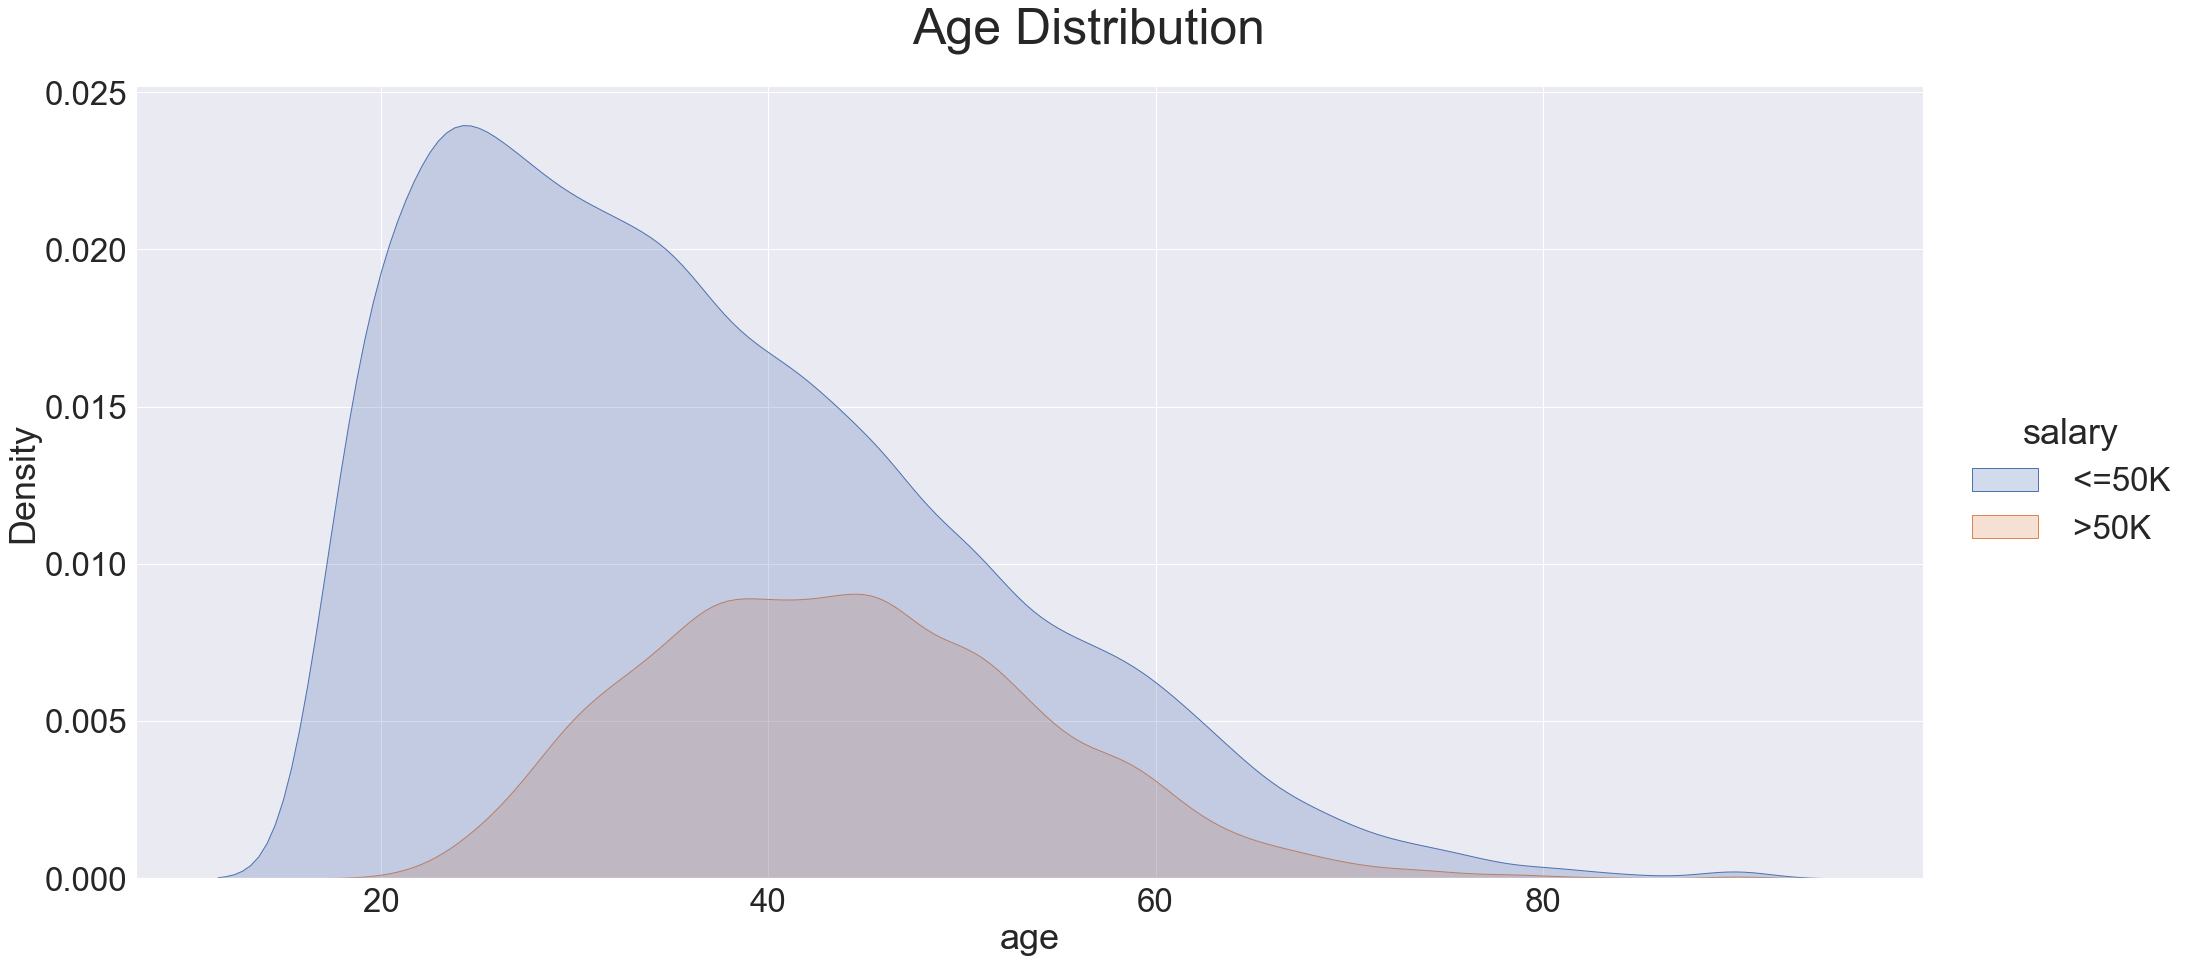

In [20]:
plot_graphs(censusdb,'age')

The Age Distribution is a rightly skewed graph  mainly for the lower income group(<=50K). For the high income group(>-50K) the median is higher meaning that the elder individuals tends to fall in the high income group.

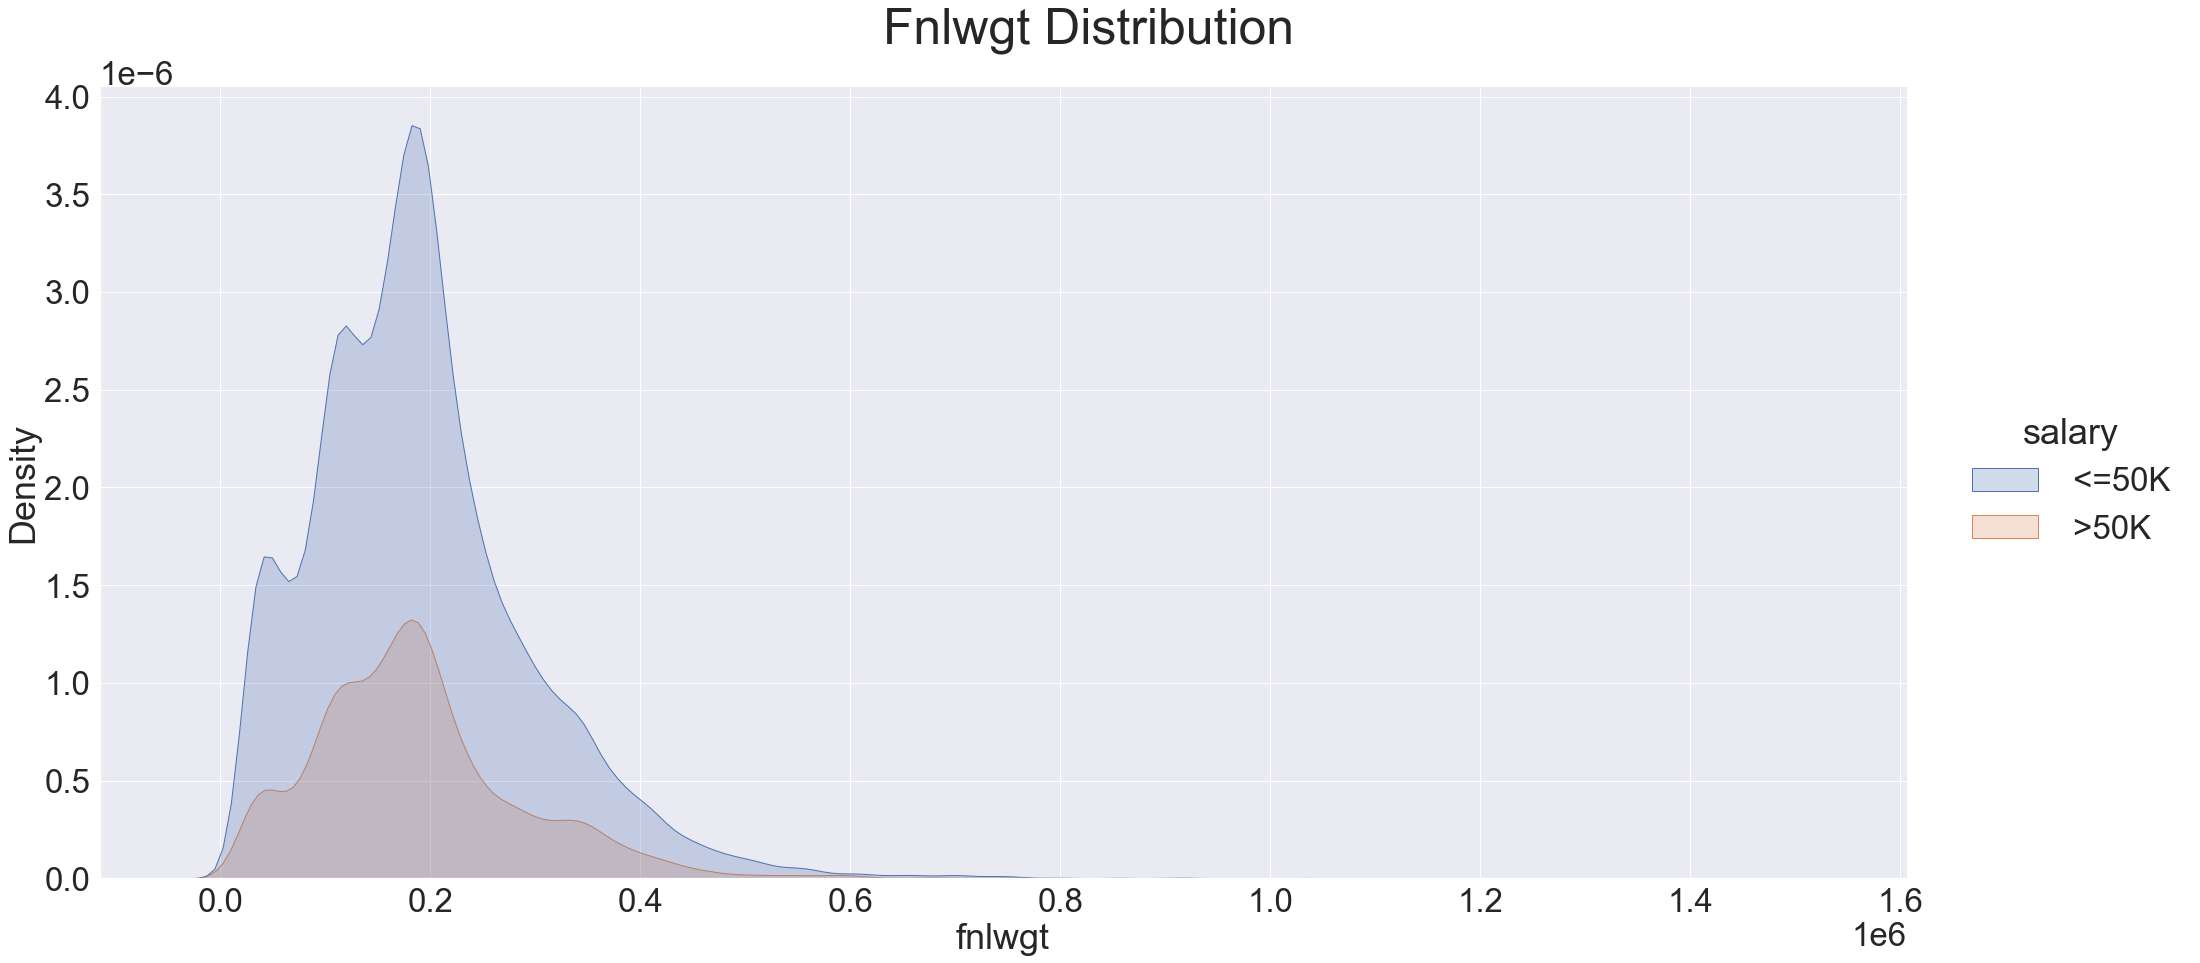

In [21]:
plot_graphs(censusdb,'fnlwgt')

- fnwlgt refers to the final weight. In other words it means that a particular individual represens these number of people in the census.
- There is huge difference  of the graph for the two salary class.

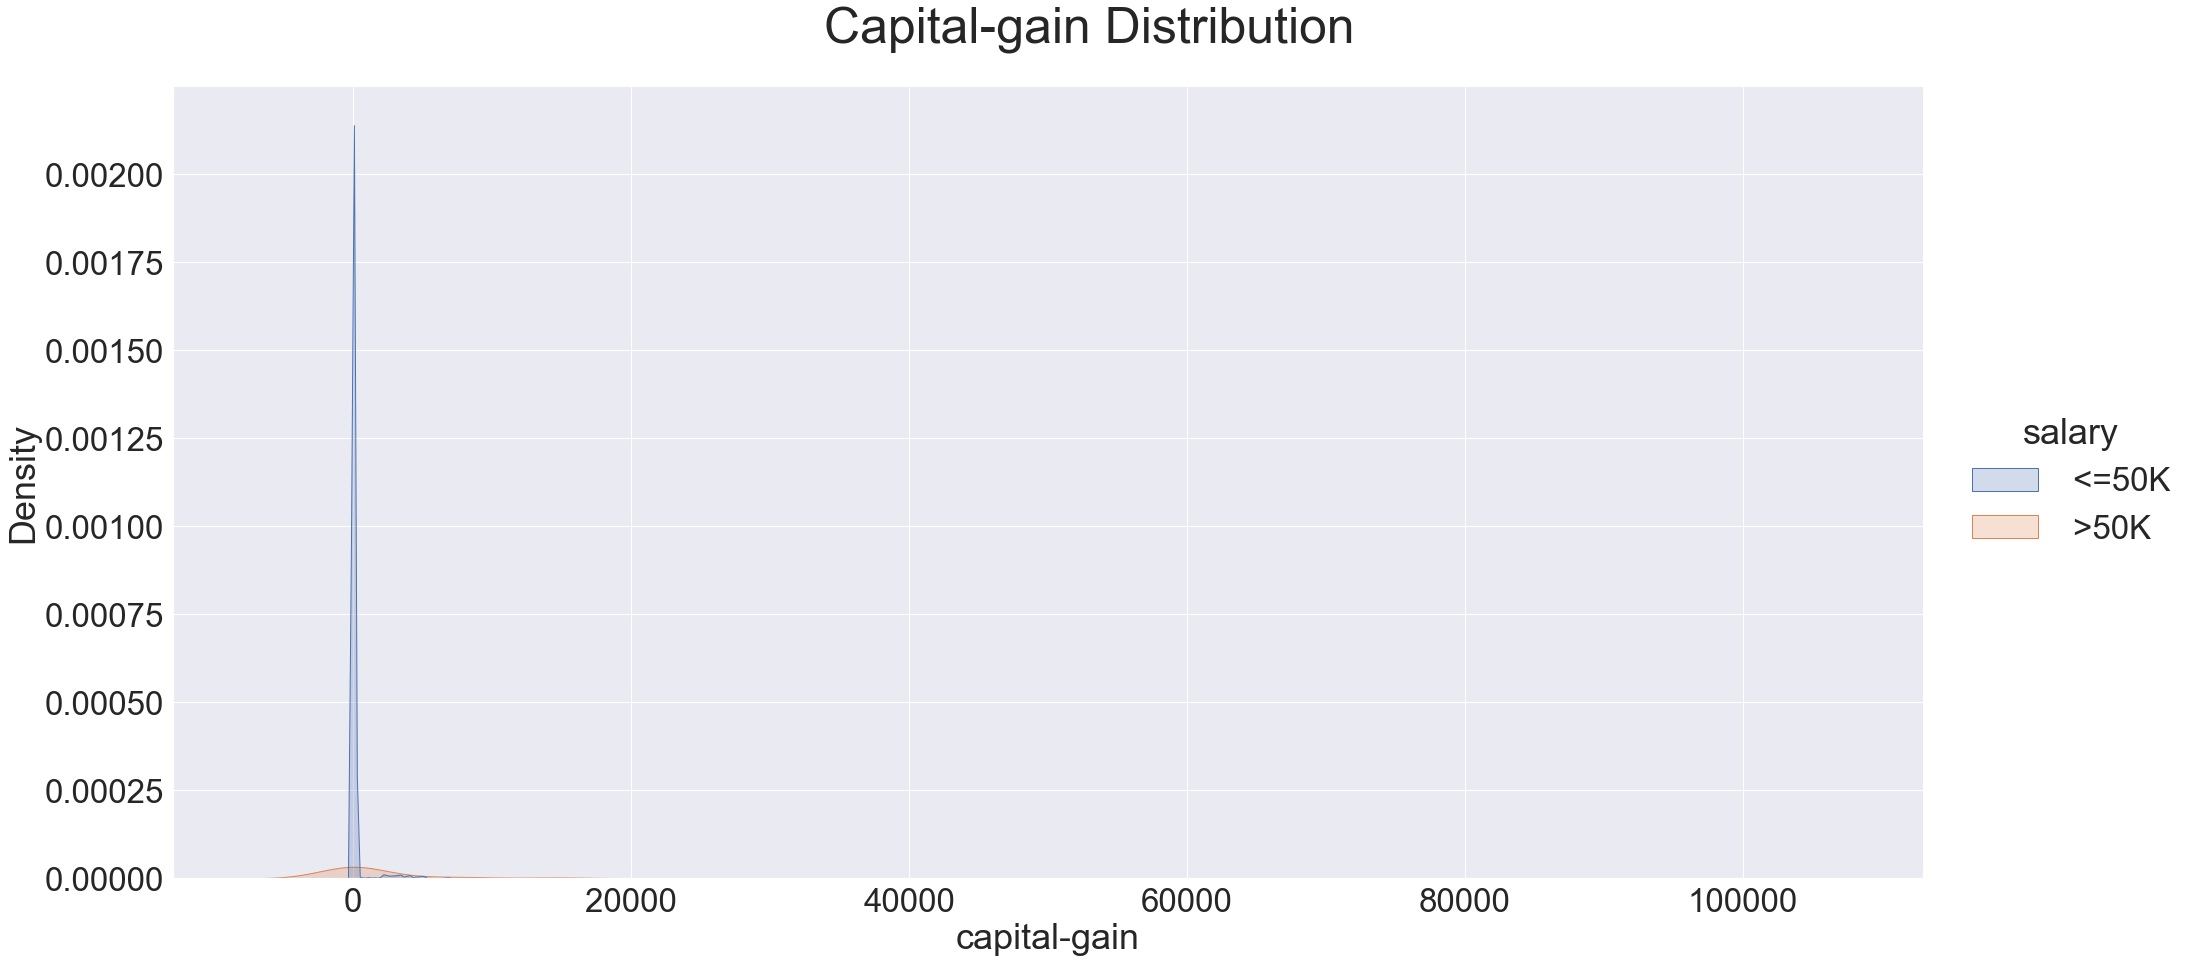

In [22]:
plot_graphs(censusdb,'capital-gain')

- There are lot of 0 values in the Capital-gain feature  for the individauls earning salary <=50K.
- The differene in Capital gain graph for the two classes of salary is huge.

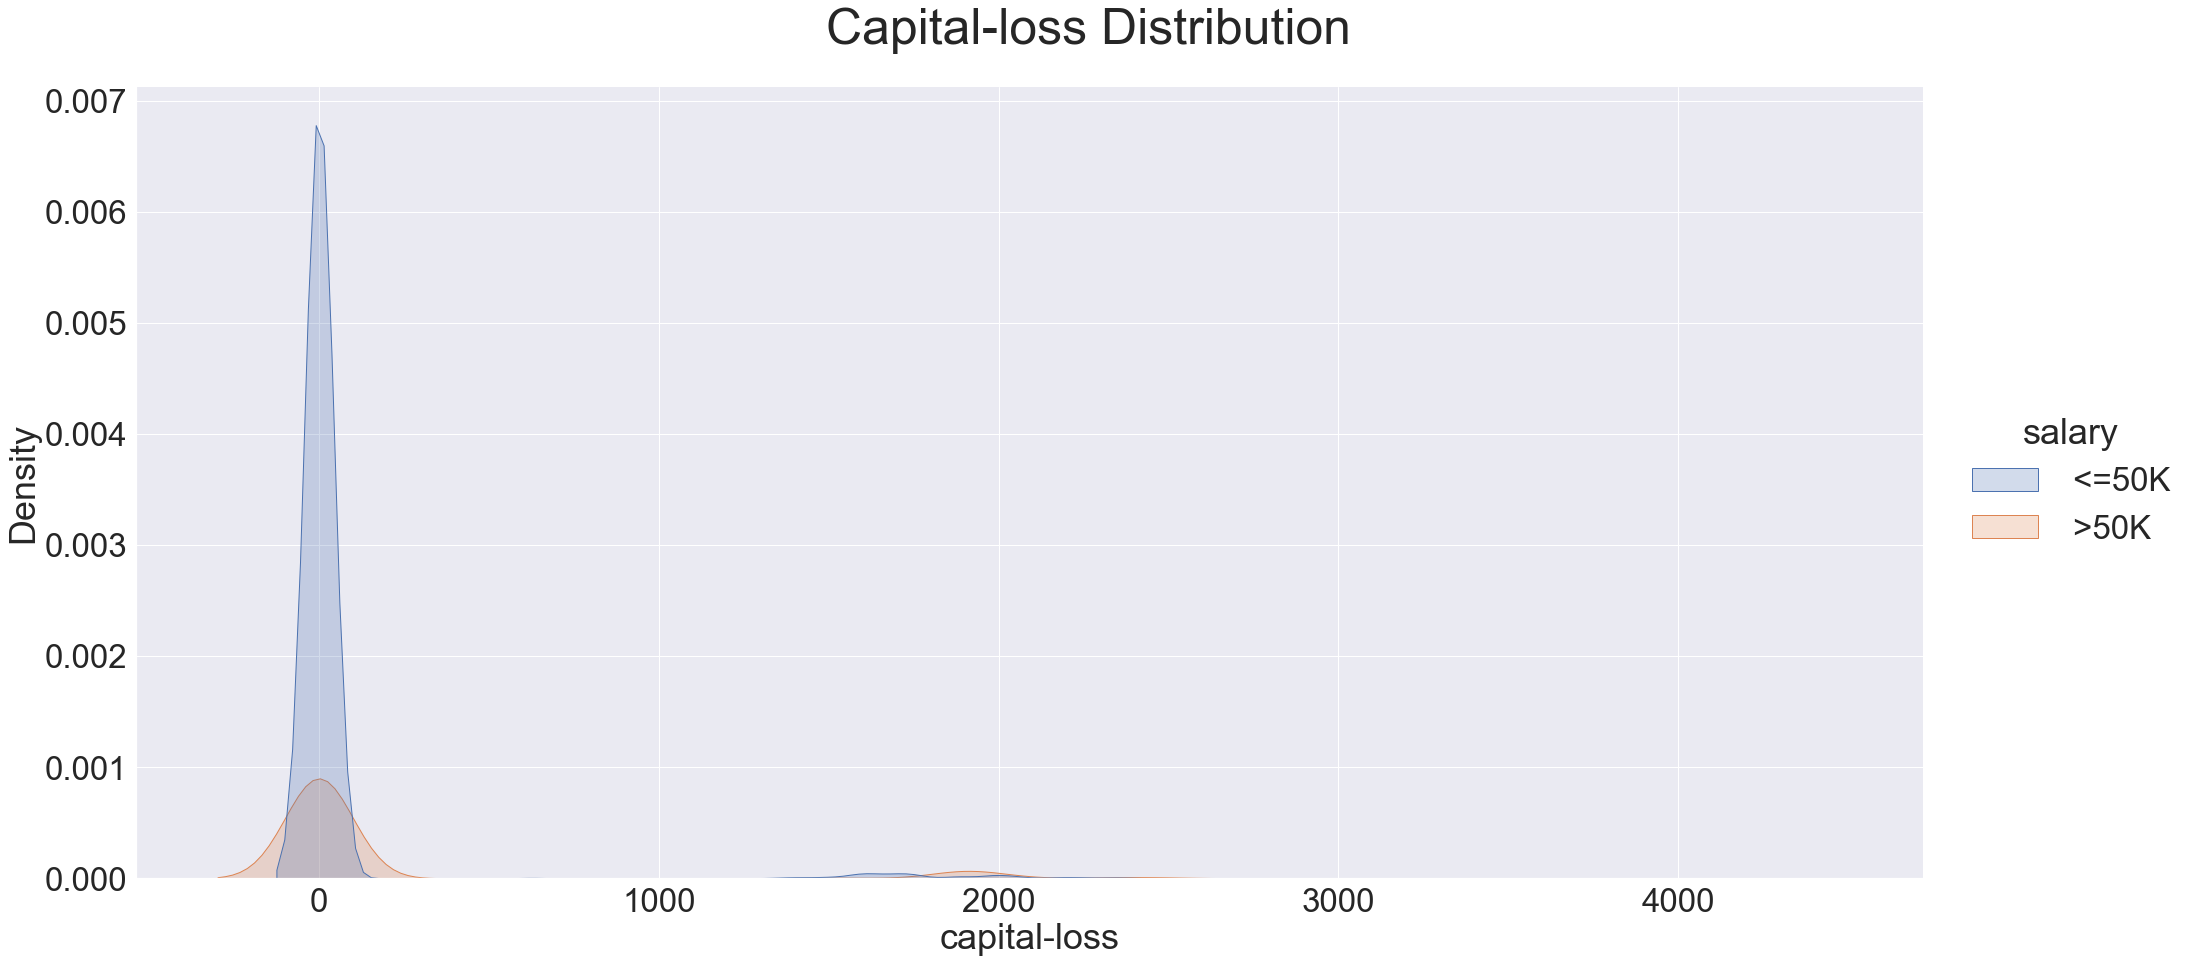

In [23]:
plot_graphs(censusdb,'capital-loss')

- There are lot of 0 values in the Capital-loss feature  for the individauls earning salary <=50K.
- There is a peak for the salary >=50K in an around 1900.

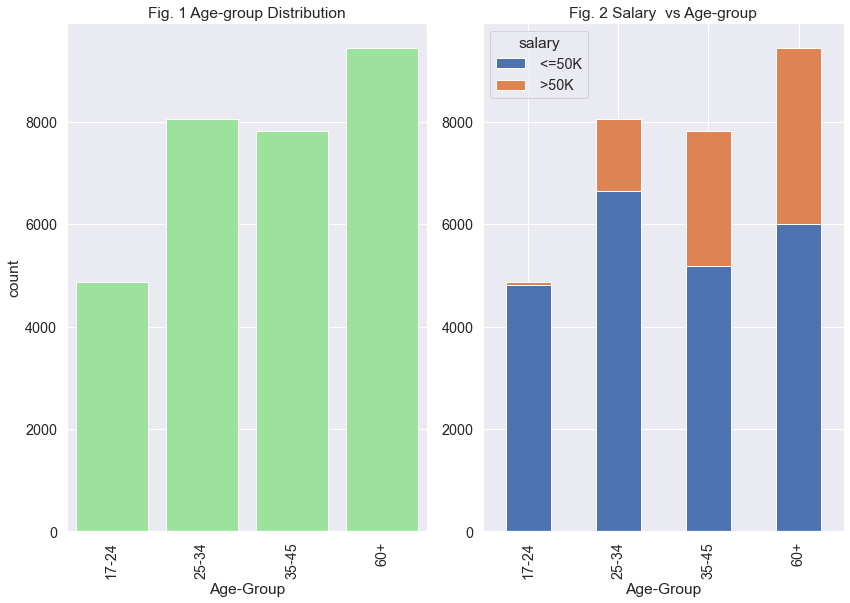

In [24]:
plot_graphs(censusdb,'Age-Group')

**Fig. 1**
- The age group 25-34 and 35-45 both combine has highest number of individuals in the database, followed by 60+ age group. The age group 17-24 has the lowest number of individuals.

**Fig. 2**
- People with age 60+ has highest probability of earning >50k compared to the other age categories.
- The age group 35-45 has the second highest probability of earning >50K.
- The age group 25-34 has the third highest probability of earning >50K.
- People belonging to the age group 17-24 has extremely low chances of earning >50k.
- As the age increases the chances of getting paid above 50K is hig.



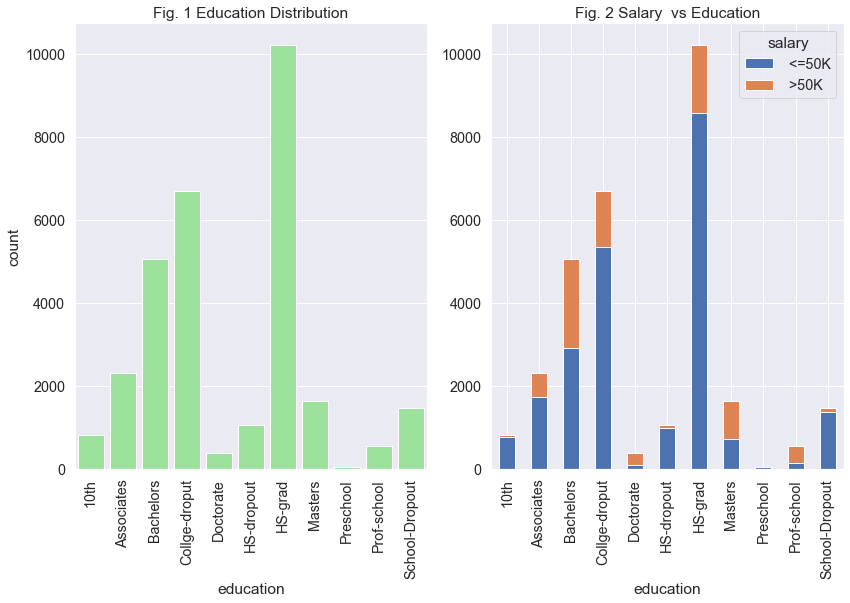

In [25]:
plot_graphs(censusdb,'education')

**Fig. 1**

- It shows the distribution of the different levels of education among individuals in the dataset
- In terms of education, HS-grad tops the chart , followed by College-dropuput and Bachelors degree.
- A small proportion of the individuals has Doctorate degree, while extremely few of them attended only Preschool.

**Fig. 2**
- It shows the relationship between the highest level of education and the salary cap.
- Individuals with higher educations tends to earn more than 50K in most of the cases.
- There is a huge correlation between education and salary cap.
- The number of individuals earning >=50K for the Doctorate, Masters, Prof-school is much higher compared to those earning <=50K.

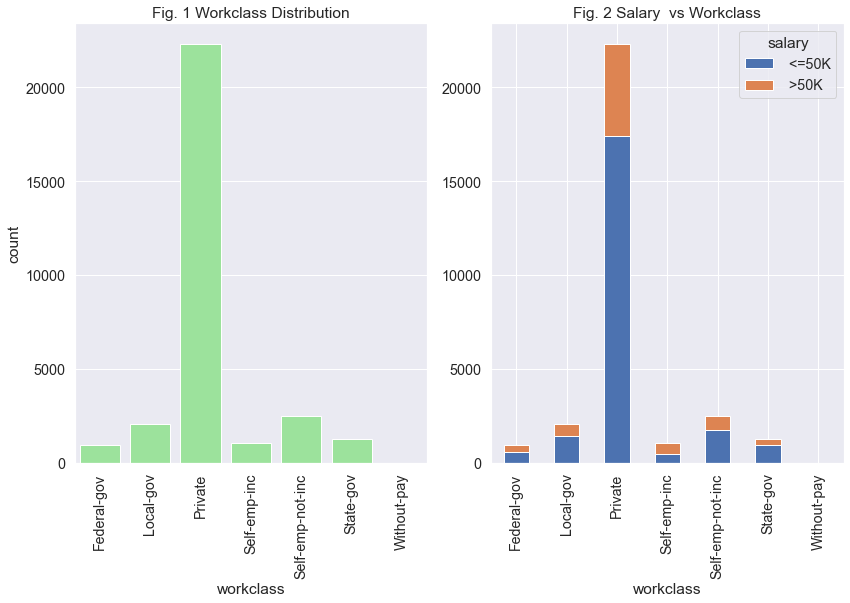

In [26]:
plot_graphs(censusdb,'workclass')

**Fig. 1**
- Most of the individuals belong to the Private workclass which is above 25000.
- The number of individuals in Local-gov and Sel-emp-not-inc(individual with their own company) is pretty much same.
- Individuals belonging to the without-pay class is extremely less.

**Fig. 2**
- Among all the sector , individuals working as Sel-emp-inc and Fedral-gov has higher probability to earn >=50K.
- Individual working in Private sector has higher chance to earn <=50K.

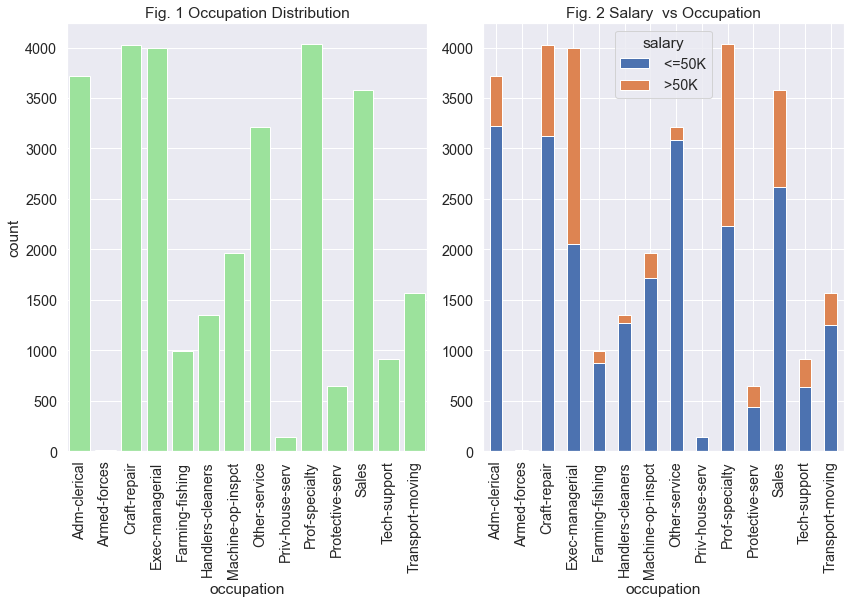

In [27]:
plot_graphs(censusdb,'occupation')

**Fig. 1**
- There is pretty much unifrom distribution of individuals working in Prof-speciality, Adm-clerical, Craft-repair, Exec-managerial and Sales.
- The number of individuals working in Armed forces is extremely less compared to all the occupation.

**Fig. 2**
- For the individuals working as  Exec-managerial, Prof-speciality has almost equal probability of earning >=50K or <=50K, but they are the only occupations that gives the individual to earn more than 50K.
- Individuals working as Priv-house-serv  earns <=50K.

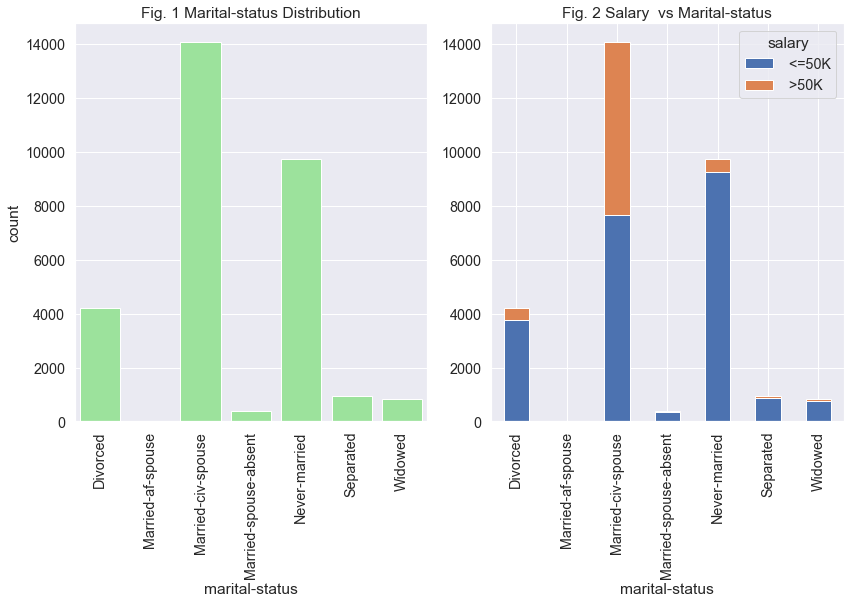

In [28]:
plot_graphs(censusdb,'marital-status')

**Fig. 1**
- The number of individuals in married-civ-spouse(no one serves in the military) is highest.
- Next is the Never married class.
- The number of individuals in the Separated and Widowed class is almost same.
- The number of individuals in the married-af-spouse is extremely less compared to all the classes.

**Fig. 2**
- Individuals belonging to the married-civ-spouse(no one serves in the military) has the highest percentage of earning >=50K amomg all the categories.

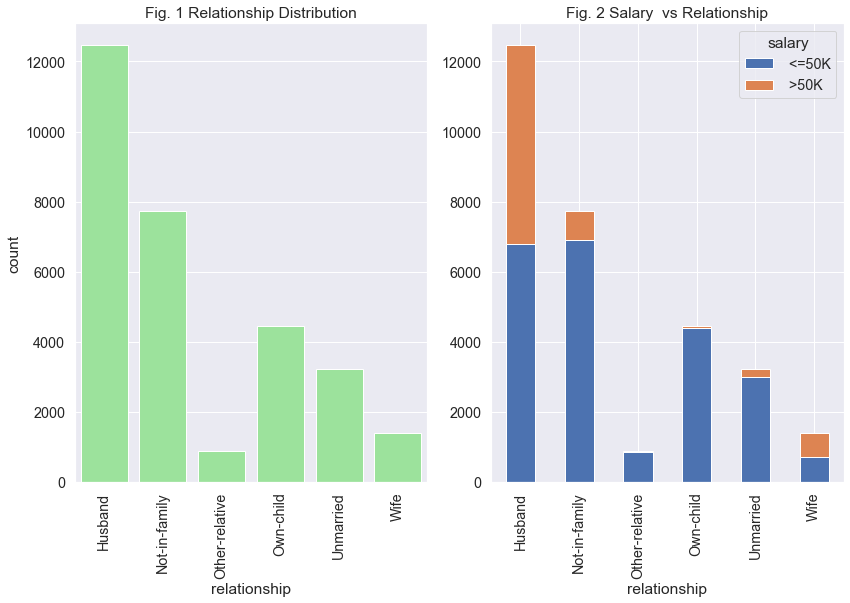

In [29]:
plot_graphs(censusdb,'relationship')

**Fig. 1**
- Most of the individuals are husband.
- Very less number of individauls belong to the other-relationship.

**Fig. 2**
- Families with children are  low-income .
- 90% of the unmarried individuals falls in the <=50K category of salary.

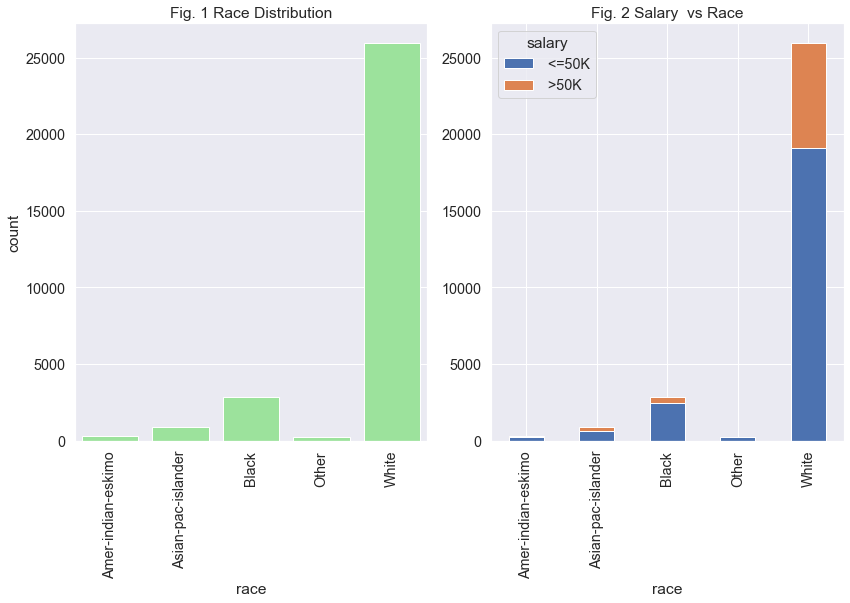

In [30]:
plot_graphs(censusdb,'race')

**Fig. 1**
- The number of individuals belonging to the White race is disproportionately large in comparison to all other races.
- The next race with highest number of individuals is Black.

**Fig. 2**
- The income distribution among the differet races are almost same.

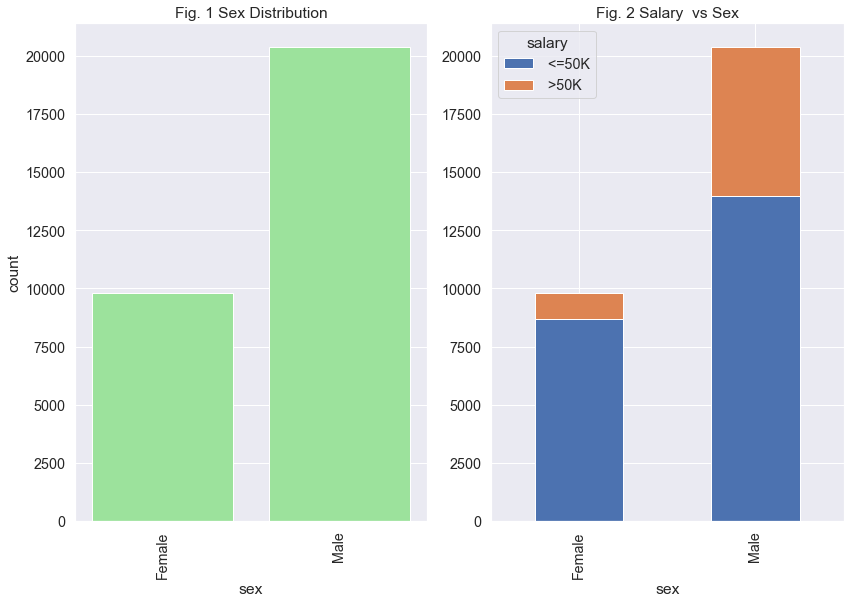

In [31]:
plot_graphs(censusdb,'sex')

**Fig. 1**

- The first plot shows the distribution of sex among the individuals.
- The ratio of male individuals in the dataset is almost twice that of the female individuals.

**Fig. 2**

- The second plot shows the distribution of salary cap based on gender of the individual.
- The number  of males who make greater than 50K is much greater than the number of females that make the same amount.

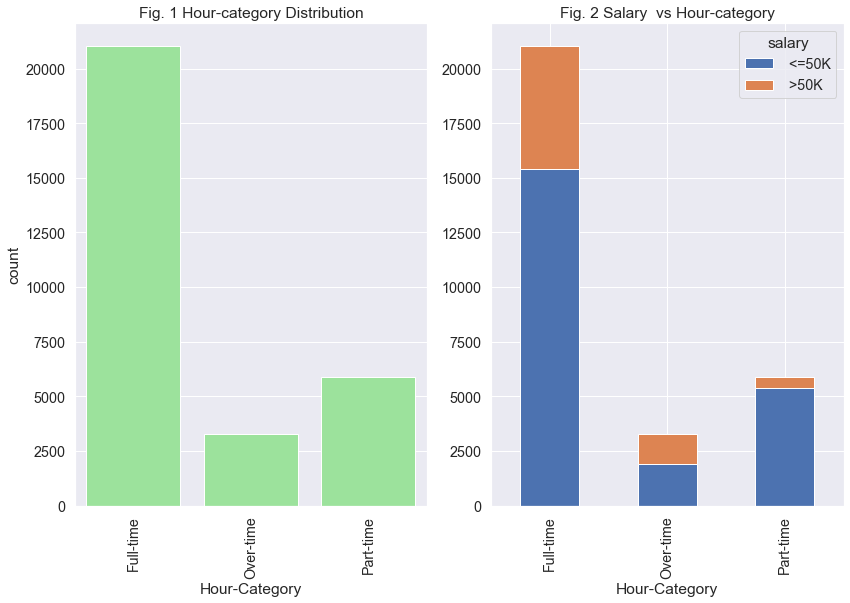

In [32]:
plot_graphs(censusdb,'Hour-Category')

**Fig. 1**
- Most of the individuals are full time employees.
- The number of individuals who worked over time are low.

**Fig. 2**
- The number of individuals earning >=50K is extremely less for Part-time workers.
- The overtime and category has higher chances to earn >=50K compared to the Full-time category workers.

# Feature Engineering

In [33]:
# importing the necessary libraries and tools
import joblib
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split ,StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline ,FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [34]:
data=db.copy()

In [35]:
# replacing the ? values wil NaN then finally dropping all the missing values 

data['workclass'] = data['workclass'].replace(to_replace=' ?',value=np.NaN)
data['occupation'] = data['occupation'].replace(to_replace=' ?',value=np.NaN)
data['country'] = data['country'].replace(to_replace=' ?',value=np.NaN)


data.dropna(axis=0,how='any',inplace=True)

In [36]:
# removing any empty space from the data
data = removeemptyspace(data)

In [37]:
# encoding the target column
data['salary'] = data['salary'].apply(lambda x:1 if x == ' >50K' else 0)

### Feature Selection

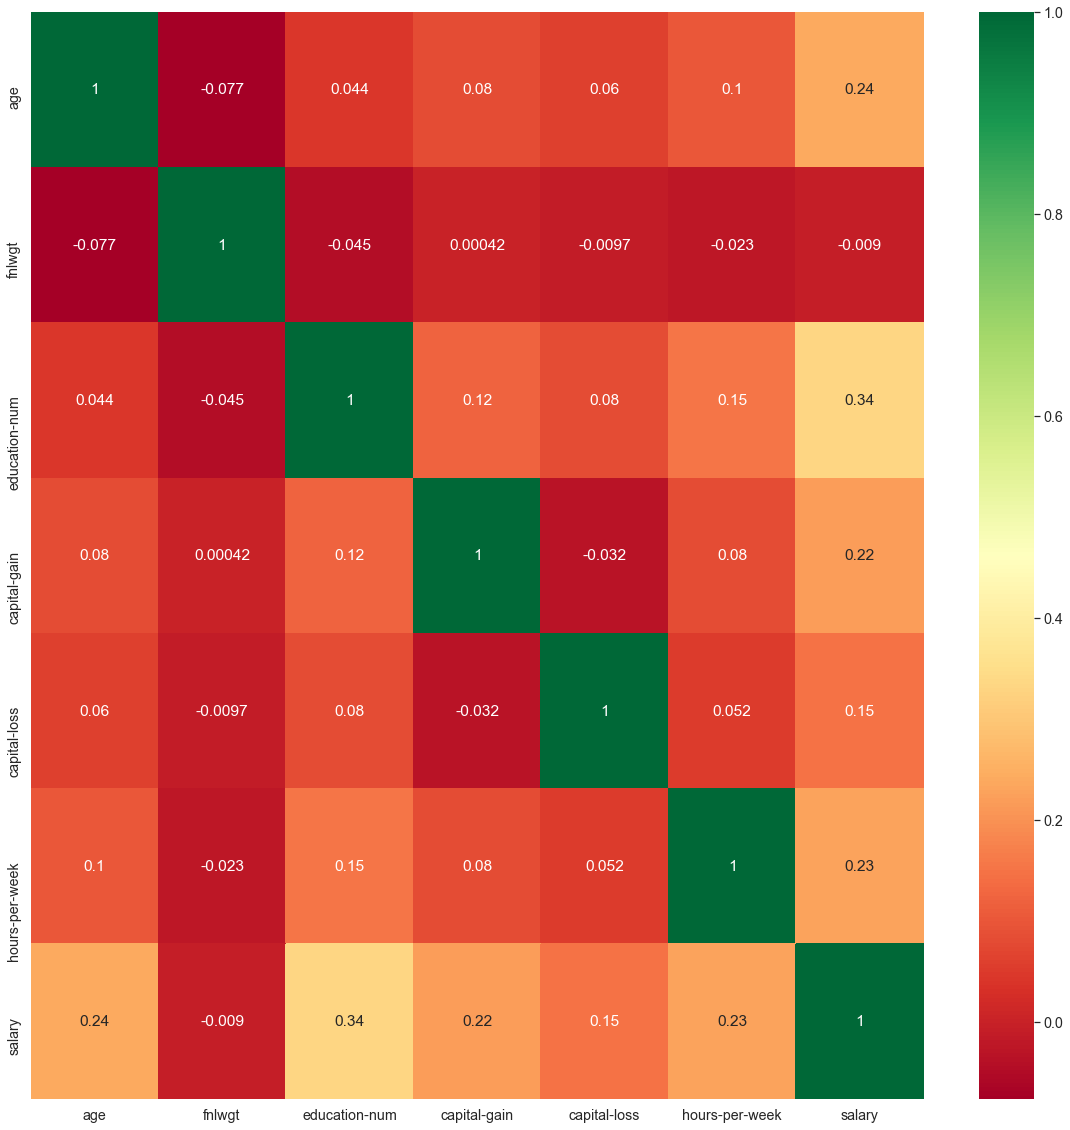

In [38]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [39]:
data.groupby(['education-num'])['education'].value_counts()

education-num  education   
1              Preschool         45
2              1st-4th          151
3              5th-6th          288
4              7th-8th          557
5              9th              455
6              10th             820
7              11th            1048
8              12th             377
9              Hs-grad         9840
10             Some-college    6678
11             Assoc-voc       1307
12             Assoc-acdm      1008
13             Bachelors       5044
14             Masters         1627
15             Prof-school      542
16             Doctorate        375
Name: education, dtype: int64

### Creating few helper classes

In [40]:
class EducationGroup(BaseEstimator, TransformerMixin):
    '''
    This class is responsible for categorizing the education features into correct format and finally returns
    '''
    
    def __init__(self):
        pass
    
    def fit(self, x_dataset, y = None):
        return self
    
    def transform(self, x_dataset):
        x_dataset['education']=x_dataset['education'].apply(lambda x:re.findall('\S+',x)[0].capitalize())
        x_dataset.dropna()
        education={'Preschool': 1 ,'1st-4th': 2,'5th-6th':3,'7th-8th':4,'9th':5,
  '10th':6,'11th':7,'12th':8,'Hs-grad':9,'Some-college':10,'Assoc-acdm':12,
  'Assoc-voc':11,'Bachelors':13,'Masters':14,'Prof-school':15,'Doctorate':16}
        
        
        x_dataset.replace({'education' : education}, inplace = True)
        
        x_dataset['education'] = x_dataset['education'].astype('int64')
        
        return x_dataset

In [41]:
'''
creating a pipeline which takes in the above three classes as a list. The pipeline class will perform all these three feature 
enigineering parallely
'''

pipeline1 = Pipeline([('EducationCat',EducationGroup())])

# we train and transform the pipeline1 object with the feature columns

features1 = pipeline1.fit_transform(data)

# saving the pipeline1
joblib.dump(pipeline1, 'Education_pipeline.pkl')

['Education_pipeline.pkl']

In [47]:
x = joblib.load('Education_pipeline.pkl')

In [48]:
x.transform(db)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,13,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,9,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,9,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,9,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [42]:
features1.dtypes

age                int64
workclass         object
fnlwgt             int64
education          int64
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary             int64
dtype: object

In [43]:
# separating the important features and the target columns
# dropping the unnecessary features from the final features.

updated_features  = features1.drop(['fnlwgt', 'salary', 'relationship', 'education-num'], axis = 1 )
target = features1[['salary']]

In [44]:
updated_features.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'country'],
      dtype='object')

In [45]:
updated_features.head()

,age,workclass,education,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39,State-gov,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-states
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-states
2,38,Private,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-states
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-states
4,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba


### Encoding the categorical values

In [45]:
transformer_list = [('one_hot_encoding', OneHotEncoder(categories= 'auto', drop = 'first', sparse = False), [1,3, 4, 5, 6, 10]), 
                    ('scaling', StandardScaler(), [0, 2, 7, 8, 9])]

column_transform = ColumnTransformer(transformer_list, remainder= 'passthrough')


final_data = column_transform.fit_transform(updated_features)


# saving the column_transformer object
joblib.dump(column_transform, 'Encode_Sacler_Pipeline.pkl')

['Encode_Sacler_Pipeline.pkl']

In [46]:
final_data

array([[ 0.        ,  0.        ,  0.        , ...,  0.14609228,
        -0.21858598, -0.07773411],
       [ 0.        ,  0.        ,  0.        , ..., -0.14744462,
        -0.21858598, -2.3315307 ],
       [ 0.        ,  1.        ,  0.        , ..., -0.14744462,
        -0.21858598, -0.07773411],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.14744462,
        -0.21858598, -0.07773411],
       [ 0.        ,  1.        ,  0.        , ..., -0.14744462,
        -0.21858598, -1.74721307],
       [ 0.        ,  0.        ,  1.        , ...,  1.88111954,
        -0.21858598, -0.07773411]])

###  Splitting the data into train and test set

In [47]:
target['salary'].value_counts(normalize=True)

0    0.751078
1    0.248922
Name: salary, dtype: float64

The distribution of the salary groups has high difference. People belonging to <50K is about 75% of the total data, so we need to perform Stratified Sampling based on the salary.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(final_data, target, test_size = 0.25, random_state = 343, 
                                                    stratify = target['salary'])

### Importing the Models

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Naive Bayes Classifier 

In [50]:
GN_clf = GaussianNB()
GN_clf.fit(X_train, y_train)

C:\Users\saiki\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [51]:
y_prediction = GN_clf.predict(X_test)

In [52]:
# comparing actual response values (y_test) with predicted response values (y_pred)

print("Gaussian Naive Bayes model accuracy(in %): {:.2f}%" .format(metrics.accuracy_score(y_test, y_prediction)*100))

Gaussian Naive Bayes model accuracy(in %): 36.55%


In [53]:
def make_confusion_matrix(actual, prediction, group_names = None, categories = 'auto', count = True, percent = True,
                          cbar = True, xyticks = True, xyplotlabels = True, sum_stats = True, figsize = None, 
                          cmap = 'Blues'):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    actual:        actual labels
    prediction:    predicted labels
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    cf = confusion_matrix(actual, prediction)
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))*100
        
        precision = cf[1,1] / sum(cf[:,1])*100
        recall    = cf[1,1] / sum(cf[1,:])*100
        f1_score  = 2*precision*recall / (precision + recall)
        
        stats_text = "\n\nAccuracy={:0.2f}%\nPrecision={:0.2f}%\nRecall={:0.2f}%\nF1 Score={:0.2f}".format(
            accuracy,precision,recall,f1_score)

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    plt.title('Confusion Matrix')

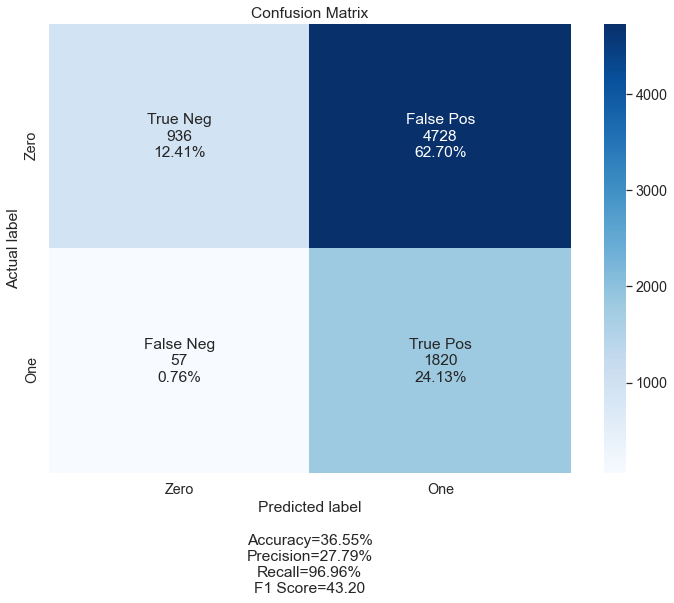

In [54]:
make_confusion_matrix(y_test, y_prediction, group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos'],
                     categories = ['Zero', 'One'])

In [55]:
auc = roc_auc_score(y_test, y_prediction)

fpr, tpr, thresholds = roc_curve(y_test, y_prediction)

In [56]:
def plot_roc_curve(fpr, tpr, thresholds, auc):
    '''
    fpr:        False positive rate
    tpr:        True positive rate
    thresholds: Threshold
    auc :       AUC score
    '''
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr,color = 'orange', marker = 'D', lw=2,label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0,1],[0,1],'k--' ,label='purely random classifier')

    for i in range(len(fpr)):
        plt.annotate('threshold = '+str(thresholds[i]), (fpr[i], tpr[i]+0.02))
        
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc=4)

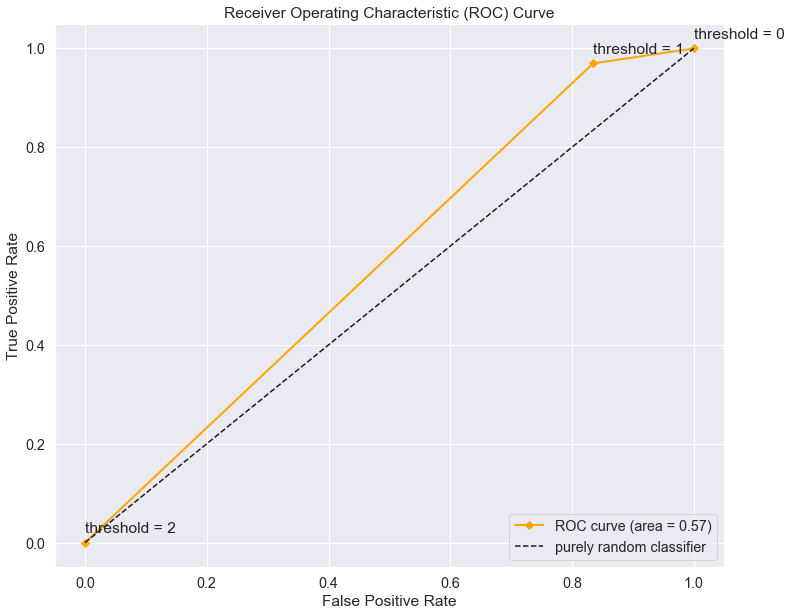

In [57]:
plot_roc_curve(fpr, tpr, thresholds, auc)

In [58]:
#Saving the NaiveBayes classifier model

import pickle

with open('C:/Users/saiki/Desktop/AdultCenusIncomePrediction'+ '/NaiveBayes.pickle', 'wb') as f:
    pickle.dump(GN_clf,f)

# Logistic Regression

In [59]:
LR_clf = LogisticRegression(solver='sag')
LR_clf.fit(X_train, y_train)

C:\Users\saiki\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\saiki\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(solver='sag')

In [60]:
y_prediction = LR_clf.predict(X_test)

In [61]:
from sklearn import metrics
print("Logistic Regression model accuracy(in %): {:.2f}%" .format(metrics.accuracy_score(y_test, y_prediction)*100))

Logistic Regression model accuracy(in %): 84.94%


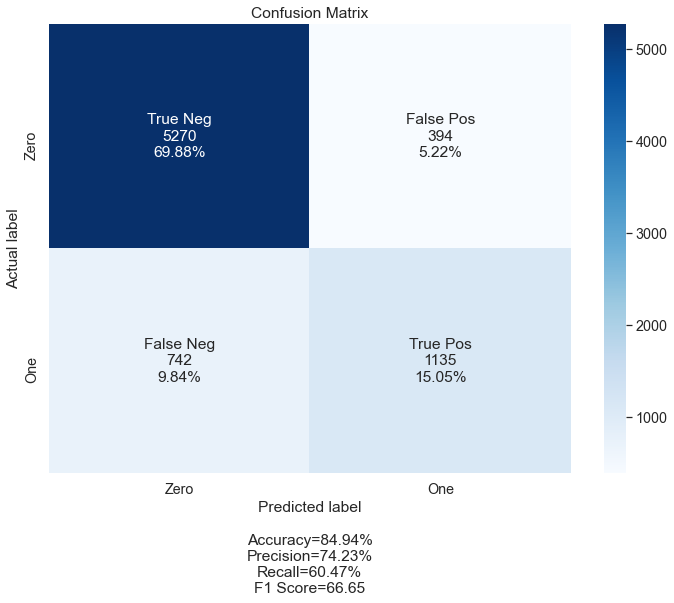

In [62]:
make_confusion_matrix(y_test, y_prediction, group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos'],
                     categories = ['Zero', 'One'])

In [63]:
auc = roc_auc_score(y_test, y_prediction)

fpr, tpr, thresholds = roc_curve(y_test, y_prediction)

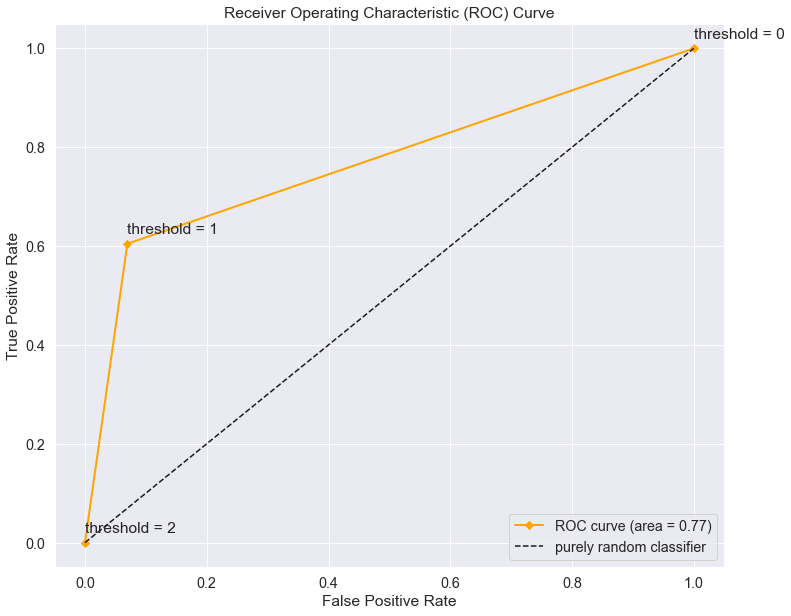

In [64]:
plot_roc_curve(fpr, tpr, thresholds, auc)

In [65]:
#Saving the LogisticRegression  model

with open('C:/Users/saiki/Desktop/AdultCenusIncomePrediction'+ '/LReg.pickle', 'wb') as f:
    pickle.dump(LR_clf,f)

# Decision Tree Classifier

In [66]:
DT_clf = DecisionTreeClassifier()
DT_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [67]:
y_prediction = DT_clf.predict(X_test)

In [68]:
from sklearn import metrics
print("Decision Tree  model accuracy(in %): {:.2f}%" .format(metrics.accuracy_score(y_test, y_prediction)*100))

Decision Tree  model accuracy(in %): 82.07%


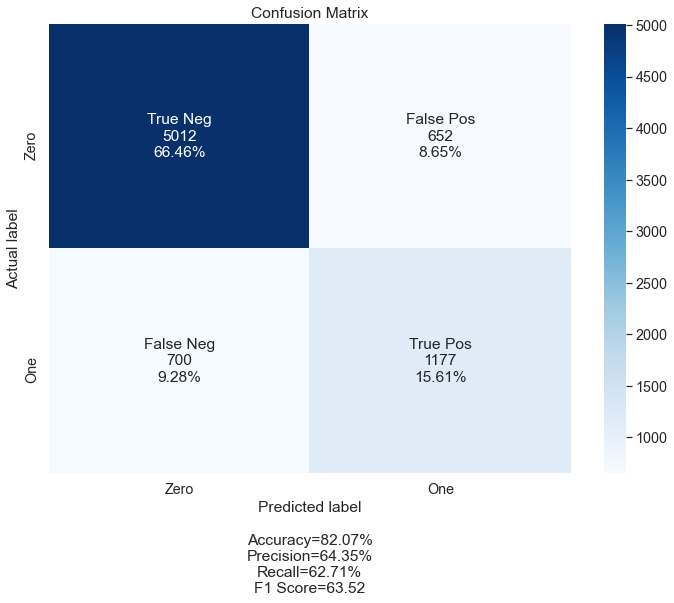

In [69]:
make_confusion_matrix(y_test, y_prediction, group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos'],
                     categories = ['Zero', 'One'])

In [70]:
auc = roc_auc_score(y_test, y_prediction)

fpr, tpr, thresholds = roc_curve(y_test, y_prediction)

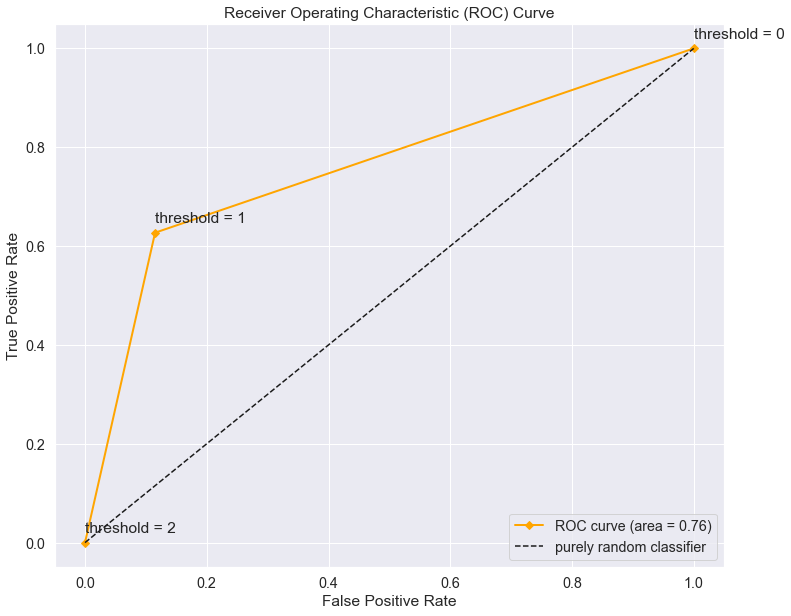

In [71]:
plot_roc_curve(fpr, tpr, thresholds, auc)

#### Hyperparameter Tuning of the DecisionTree Classifier

##### GridSearchCV

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
param_grid = {'criterion': ['gini', 'entropy'], 'splitter' : ['best', 'random'], 'max_depth': [2, 4, 8, 16, 20, 25, 31], 
                  'min_samples_leaf': [2, 5, 7, 9], 'min_samples_split' : [2, 5, 7,9]}

grid_search = GridSearchCV(DT_clf, param_grid, cv = 5, n_jobs = -1, verbose = 1)

In [74]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 448 candidates, totalling 2240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2240 out of 2240 | elapsed:  2.0min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 20, 25, 31],
                         'min_samples_leaf': [2, 5, 7, 9],
                         'min_samples_split': [2, 5, 7, 9],
                         'splitter': ['best', 'random']},
             verbose=1)

In [75]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'splitter': 'best'}

In [76]:
grid_search.best_score_

0.8507142263972136

In [77]:
dtree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 8, min_samples_leaf= 2, min_samples_split = 7,
                                  splitter= 'best')

dtree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=7)

In [78]:
# accuracy of the model in the test data
print("Decision Tree  model accuracy(in %): {:.2f}%" .format(dtree_clf.score(X_test,y_test)*100))

Decision Tree  model accuracy(in %): 85.56%


In [79]:
y_prediction = dtree_clf.predict(X_test)

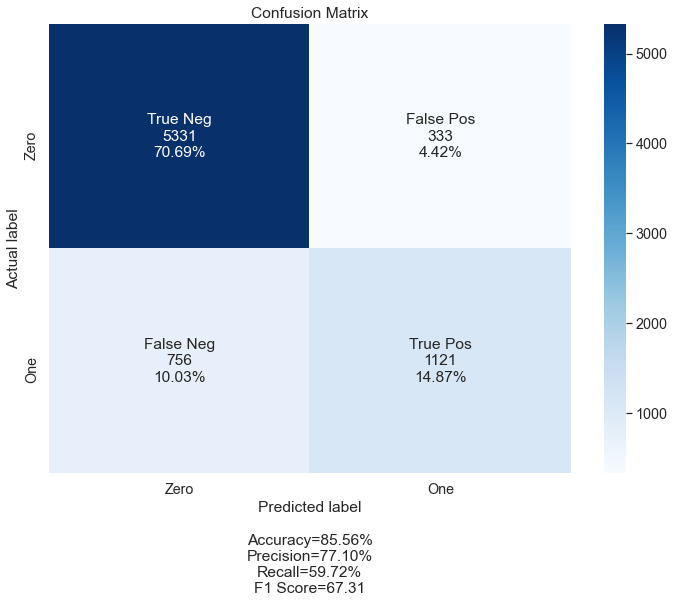

In [80]:
make_confusion_matrix(y_test, y_prediction, group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos'],
                     categories = ['Zero', 'One'])

In [81]:
dt_auc = roc_auc_score(y_test, y_prediction)

dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, y_prediction)

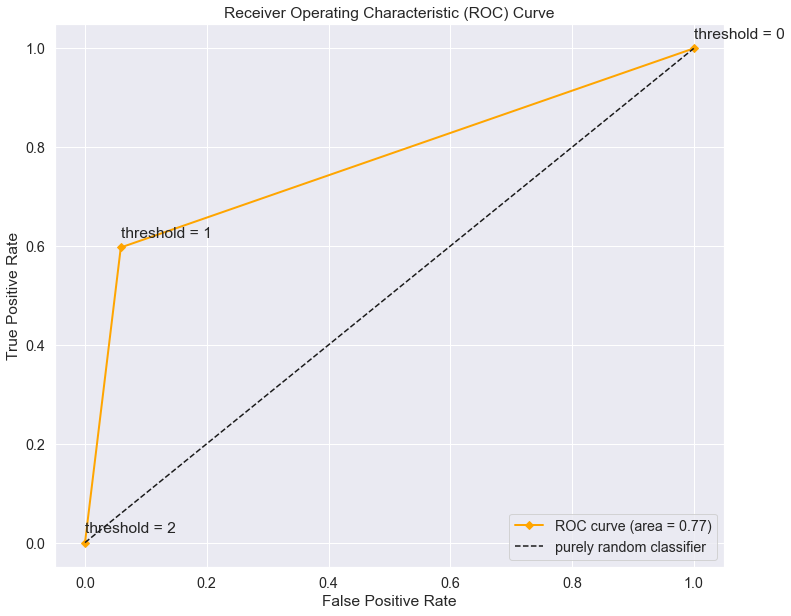

In [82]:
plot_roc_curve(dt_fpr, dt_tpr, dt_thresholds, dt_auc)

In [83]:
#Saving the DecisionTree classifier model

import pickle

with open('C:/Users/saiki/Desktop/AdultCenusIncomePrediction'+ '/DecisionTree.pickle', 'wb') as f:
    pickle.dump(dtree_clf,f)

## Random Forest model¶

In [84]:
forest_clf = RandomForestClassifier(random_state= 42)
forest_clf.fit(X_train, y_train)

<ipython-input-84-d5de1c6fcbfc>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [85]:
y_prediction = forest_clf.predict(X_test)

print("RandomForest model  model accuracy(in %): {:.2f}%" .format(metrics.accuracy_score(y_test, y_prediction)*100))

RandomForest model  model accuracy(in %): 84.72%


#### Fine tuning the model

##### GridSearchCV

In [86]:
grid_param = {'n_estimators' : [40,60,80,100], 'criterion': ['gini', 'entropy'],
              'max_depth' : [2, 4, 6, 10, 14, 17, 20], 'min_samples_leaf' : [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10], 'max_features' : ['auto','log2']}


grid_search = GridSearchCV(estimator= forest_clf, param_grid = grid_param, cv = 5 ,n_jobs = -1, verbose = 1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2800 candidates, totalling 14000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 11226 tasks      

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 14, 17, 20],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [40, 60, 80, 100]},
             verbose=1)

In [87]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 60}

In [91]:
grid_search.best_score_

0.8311745338550445

In [88]:
forest_clf = RandomForestClassifier(n_estimators = 60, criterion = 'entropy', max_depth = 20, max_features = 'auto',
                                    min_samples_leaf= 2, min_samples_split= 6, random_state= 42)
forest_clf.fit(X_train, y_train)

<ipython-input-88-93d87a2af0b3>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_clf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       min_samples_split=6, n_estimators=60, random_state=42)

In [89]:
print("RandomForestClassifier model accuracy(in %): {:.2f}%" .format(forest_clf.score(X_test,y_test)*100))

RandomForestClassifier model accuracy(in %): 86.22%


In [90]:
y_prediction = forest_clf.predict(X_test)

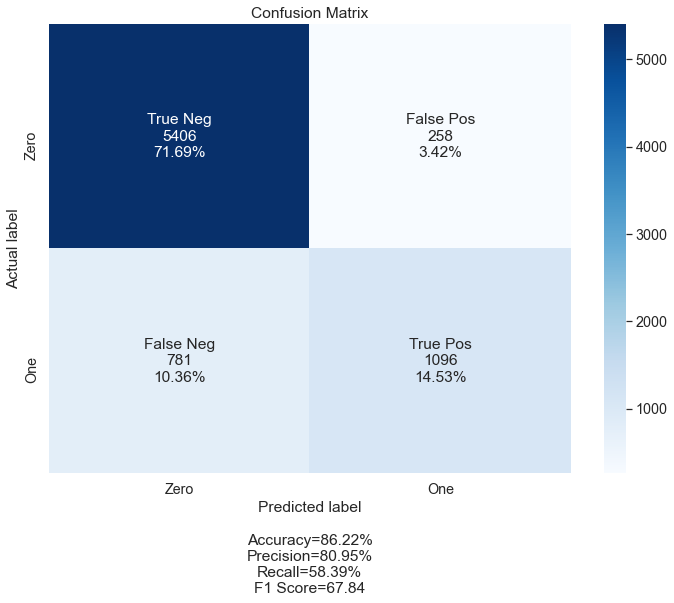

In [91]:
make_confusion_matrix(y_test, y_prediction, group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos'],
                     categories = ['Zero', 'One'])

In [92]:
rf_auc = roc_auc_score(y_test, y_prediction)

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, y_prediction)

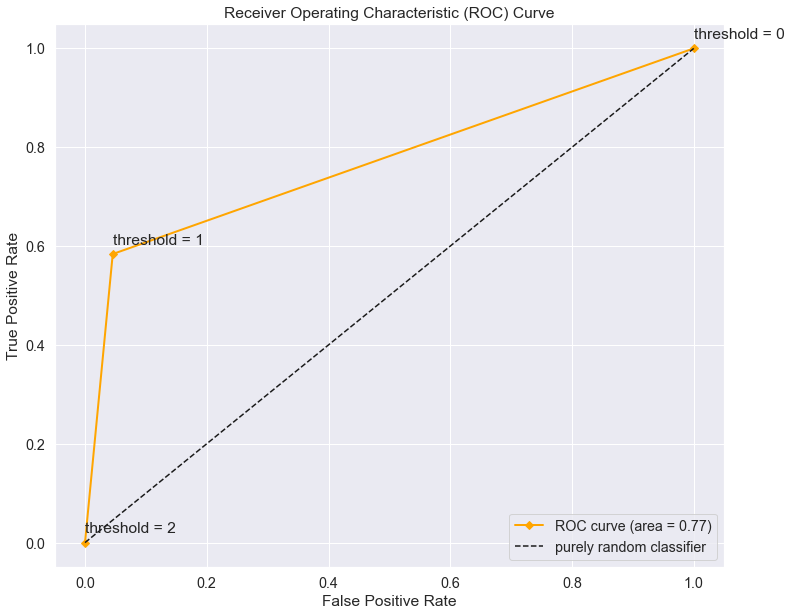

In [93]:
plot_roc_curve(rf_fpr, rf_tpr, rf_thresholds, rf_auc)

In [94]:
#Saving the RandomForest classifier model

import pickle

with open('C:/Users/saiki/Desktop/AdultCenusIncomePrediction'+ '/RandomForest.pickle', 'wb') as f:
    pickle.dump(forest_clf,f)

# KNNClassifier

In [95]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

<ipython-input-95-44eaa9d213c6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_clf.fit(X_train,y_train)


KNeighborsClassifier()

In [96]:
y_prediction = knn_clf.predict(X_test)

print("KNNclassifier model  model accuracy(in %): {:.2f}%" .format(metrics.accuracy_score(y_test, y_prediction)*100))

KNNclassifier model  model accuracy(in %): 83.78%


###### Fine Tuning the model

In [97]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [10, 16, 23, 30],
               'n_neighbors' : [3, 7, 13], 'p':[1,2]
              }


gridsearch = GridSearchCV(estimator = knn_clf, param_grid = param_grid, cv=5, verbose=3)

In [98]:
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1 ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, score=0.818, total=   6.3s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1 ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s
C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, score=0.820, total=   6.3s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1 ...........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.5s remaining:    0.0s
C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, score=0.824, total=   6.2s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, score=0.819, total=   6.4s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, score=0.827, total=   6.4s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2, score=0.821, total=   6.2s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2, score=0.821, total=   6.2s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2, score=0.824, total=   6.2s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2, score=0.822, total=   6.2s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2, score=0.824, total=   6.4s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=1, score=0.834, total=   6.6s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=1, score=0.838, total=   6.8s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=1, score=0.838, total=   6.9s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=1, score=0.837, total=   6.6s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=1, score=0.831, total=   6.7s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=2, score=0.837, total=   6.8s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=2, score=0.836, total=   6.9s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=2, score=0.839, total=   6.6s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=2, score=0.831, total=   6.9s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=2, score=0.831, total=   7.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=1 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=1, score=0.837, total=   7.5s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=1 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=1, score=0.840, total=   7.2s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=1 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=1, score=0.845, total=   7.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=1 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=1, score=0.840, total=   7.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=1 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=1, score=0.838, total=   6.9s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=2 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=2, score=0.836, total=   7.2s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=2 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=2, score=0.844, total=   7.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=2 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=2, score=0.841, total=   6.9s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=2 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=2, score=0.841, total=   7.2s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=2 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=2, score=0.834, total=   7.2s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=3, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=3, p=1, score=0.818, total=   6.3s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=3, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=3, p=1, score=0.820, total=   6.1s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=3, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=3, p=1, score=0.824, total=   6.0s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=3, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=3, p=1, score=0.819, total=   6.4s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=3, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=3, p=1, score=0.827, total=   6.2s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=3, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=3, p=2, score=0.821, total=   6.4s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=3, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=3, p=2, score=0.821, total=   6.4s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=3, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=3, p=2, score=0.824, total=   6.1s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=3, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=3, p=2, score=0.822, total=   6.4s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=3, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=3, p=2, score=0.824, total=   6.3s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=7, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=7, p=1, score=0.834, total=   6.8s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=7, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=7, p=1, score=0.838, total=   7.0s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=7, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=7, p=1, score=0.838, total=   7.5s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=7, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=7, p=1, score=0.837, total=   6.8s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=7, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=7, p=1, score=0.831, total=   6.6s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=7, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=7, p=2, score=0.837, total=   6.8s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=7, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=7, p=2, score=0.836, total=   6.7s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=7, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=7, p=2, score=0.839, total=   6.7s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=7, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=7, p=2, score=0.831, total=   6.9s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=7, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=7, p=2, score=0.831, total=   7.0s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=13, p=1 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=13, p=1, score=0.837, total=   7.1s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=13, p=1 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=13, p=1, score=0.840, total=   7.2s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=13, p=1 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=13, p=1, score=0.845, total=   7.0s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=13, p=1 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=13, p=1, score=0.840, total=   7.1s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=13, p=1 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=13, p=1, score=0.838, total=   8.0s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=13, p=2 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=13, p=2, score=0.836, total=   7.5s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=13, p=2 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=13, p=2, score=0.844, total=   7.5s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=13, p=2 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=13, p=2, score=0.841, total=   7.3s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=13, p=2 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=13, p=2, score=0.841, total=   7.7s
[CV] algorithm=ball_tree, leaf_size=16, n_neighbors=13, p=2 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=16, n_neighbors=13, p=2, score=0.834, total=   7.5s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=3, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=3, p=1, score=0.818, total=   8.3s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=3, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=3, p=1, score=0.820, total=   7.4s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=3, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=3, p=1, score=0.824, total=   8.3s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=3, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=3, p=1, score=0.818, total=   7.6s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=3, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=3, p=1, score=0.827, total=   8.4s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=3, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=3, p=2, score=0.821, total=   7.6s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=3, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=3, p=2, score=0.820, total=   8.0s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=3, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=3, p=2, score=0.823, total=   7.8s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=3, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=3, p=2, score=0.821, total=   6.8s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=3, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=3, p=2, score=0.825, total=   7.2s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=7, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=7, p=1, score=0.833, total=   8.3s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=7, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=7, p=1, score=0.838, total=   7.9s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=7, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=7, p=1, score=0.838, total=   7.2s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=7, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=7, p=1, score=0.837, total=   7.5s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=7, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=7, p=1, score=0.831, total=   7.9s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=7, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=7, p=2, score=0.837, total=   7.8s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=7, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=7, p=2, score=0.837, total=   7.2s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=7, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=7, p=2, score=0.840, total=   8.2s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=7, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=7, p=2, score=0.833, total=   7.4s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=7, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=7, p=2, score=0.832, total=   9.2s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=13, p=1 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=13, p=1, score=0.838, total=   8.2s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=13, p=1 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=13, p=1, score=0.840, total=   7.9s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=13, p=1 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=13, p=1, score=0.845, total=   7.4s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=13, p=1 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=13, p=1, score=0.841, total=   7.8s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=13, p=1 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=13, p=1, score=0.838, total=   8.2s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=13, p=2 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=13, p=2, score=0.835, total=   7.2s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=13, p=2 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=13, p=2, score=0.844, total=   7.4s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=13, p=2 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=13, p=2, score=0.841, total=   8.0s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=13, p=2 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=13, p=2, score=0.840, total=   8.3s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=13, p=2 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=13, p=2, score=0.833, total=   8.3s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=1, score=0.818, total=   7.7s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=1, score=0.820, total=   7.6s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=1, score=0.824, total=   7.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=1, score=0.818, total=   6.9s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=1, score=0.827, total=   7.2s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=2, score=0.821, total=   8.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=2, score=0.820, total=   7.5s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=2, score=0.823, total=   7.2s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=2, score=0.821, total=   7.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=2, score=0.825, total=   7.5s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, score=0.833, total=   7.6s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, score=0.838, total=   8.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, score=0.838, total=   8.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, score=0.837, total=   7.3s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, score=0.831, total=   7.3s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2, score=0.837, total=   7.4s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2, score=0.837, total=   7.8s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2, score=0.840, total=   7.8s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2, score=0.833, total=   7.3s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2 ...........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2, score=0.832, total=   7.3s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=1 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=1, score=0.838, total=   7.7s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=1 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=1, score=0.840, total=   7.6s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=1 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=1, score=0.845, total=   7.8s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=1 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=1, score=0.841, total=   7.7s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=1 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=1, score=0.838, total=   8.4s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=2 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=2, score=0.835, total=   8.5s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=2 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=2, score=0.844, total=   8.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=2 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=2, score=0.841, total=   8.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=2 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=2, score=0.840, total=   9.3s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=2 ..........


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=2, score=0.833, total=   7.4s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=1, score=0.817, total=   3.4s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=1, score=0.821, total=   4.2s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=1, score=0.823, total=   4.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=1, score=0.820, total=   3.9s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=1, score=0.827, total=   3.6s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2, score=0.822, total=   4.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2, score=0.821, total=   4.2s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2, score=0.823, total=   3.6s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2, score=0.823, total=   4.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2, score=0.825, total=   4.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1, score=0.833, total=   4.7s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1, score=0.837, total=   4.7s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1, score=0.839, total=   4.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1, score=0.836, total=   4.7s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1, score=0.830, total=   4.3s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=2, score=0.837, total=   4.5s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=2, score=0.837, total=   4.8s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=2, score=0.840, total=   4.3s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=2, score=0.831, total=   4.7s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=2, score=0.832, total=   4.6s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=1 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=1, score=0.838, total=   5.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=1 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=1, score=0.840, total=   5.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=1 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=1, score=0.844, total=   4.6s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=1 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=1, score=0.840, total=   5.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=1 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=1, score=0.838, total=   4.9s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=2 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=2, score=0.835, total=   5.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=2 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=2, score=0.843, total=   5.2s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=2 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=2, score=0.840, total=   4.7s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=2 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=2, score=0.840, total=   5.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=2 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=2, score=0.834, total=   5.3s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=3, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=3, p=1, score=0.817, total=   3.4s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=3, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=3, p=1, score=0.821, total=   3.4s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=3, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=3, p=1, score=0.823, total=   3.1s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=3, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=3, p=1, score=0.820, total=   3.4s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=3, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=3, p=1, score=0.827, total=   3.5s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=3, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=3, p=2, score=0.822, total=   3.7s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=3, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=3, p=2, score=0.821, total=   3.7s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=3, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=3, p=2, score=0.823, total=   3.4s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=3, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=3, p=2, score=0.823, total=   3.7s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=3, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=3, p=2, score=0.825, total=   3.7s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=7, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=7, p=1, score=0.833, total=   4.3s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=7, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=7, p=1, score=0.837, total=   4.2s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=7, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=7, p=1, score=0.839, total=   4.4s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=7, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=7, p=1, score=0.836, total=   4.1s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=7, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=7, p=1, score=0.830, total=   4.6s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=7, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=7, p=2, score=0.837, total=   4.4s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=7, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=7, p=2, score=0.837, total=   4.5s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=7, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=7, p=2, score=0.840, total=   4.2s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=7, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=7, p=2, score=0.831, total=   4.4s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=7, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=7, p=2, score=0.832, total=   4.4s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=13, p=1 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=13, p=1, score=0.838, total=   4.9s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=13, p=1 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=13, p=1, score=0.840, total=   4.9s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=13, p=1 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=13, p=1, score=0.844, total=   4.7s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=13, p=1 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=13, p=1, score=0.840, total=   5.0s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=13, p=1 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=13, p=1, score=0.838, total=   5.0s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=13, p=2 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=13, p=2, score=0.835, total=   5.1s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=13, p=2 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=13, p=2, score=0.843, total=   5.2s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=13, p=2 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=13, p=2, score=0.840, total=   4.8s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=13, p=2 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=13, p=2, score=0.840, total=   5.1s
[CV] algorithm=kd_tree, leaf_size=16, n_neighbors=13, p=2 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=16, n_neighbors=13, p=2, score=0.834, total=   5.2s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=3, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=3, p=1, score=0.817, total=   3.5s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=3, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=3, p=1, score=0.821, total=   3.5s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=3, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=3, p=1, score=0.823, total=   3.3s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=3, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=3, p=1, score=0.819, total=   3.5s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=3, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=3, p=1, score=0.827, total=   3.5s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=3, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=3, p=2, score=0.821, total=   3.5s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=3, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=3, p=2, score=0.821, total=   3.6s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=3, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=3, p=2, score=0.823, total=   3.2s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=3, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=3, p=2, score=0.823, total=   3.6s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=3, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=3, p=2, score=0.825, total=   3.5s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=7, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=7, p=1, score=0.833, total=   4.2s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=7, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=7, p=1, score=0.838, total=   4.2s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=7, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=7, p=1, score=0.838, total=   4.1s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=7, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=7, p=1, score=0.836, total=   4.2s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=7, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=7, p=1, score=0.831, total=   4.3s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=7, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=7, p=2, score=0.837, total=   4.2s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=7, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=7, p=2, score=0.836, total=   4.1s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=7, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=7, p=2, score=0.840, total=   3.7s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=7, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=7, p=2, score=0.832, total=   4.1s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=7, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=7, p=2, score=0.832, total=   4.2s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=13, p=1 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=13, p=1, score=0.838, total=   5.1s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=13, p=1 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=13, p=1, score=0.840, total=   4.9s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=13, p=1 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=13, p=1, score=0.844, total=   4.8s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=13, p=1 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=13, p=1, score=0.840, total=   5.0s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=13, p=1 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=13, p=1, score=0.837, total=   4.9s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=13, p=2 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=13, p=2, score=0.835, total=   5.5s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=13, p=2 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=13, p=2, score=0.844, total=   4.9s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=13, p=2 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=13, p=2, score=0.841, total=   4.6s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=13, p=2 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=13, p=2, score=0.840, total=   5.0s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=13, p=2 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=13, p=2, score=0.834, total=   5.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=1, score=0.817, total=   3.8s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=1, score=0.821, total=   4.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=1, score=0.823, total=   3.8s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=1, score=0.819, total=   3.6s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=1, score=0.827, total=   3.7s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, score=0.821, total=   3.7s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, score=0.821, total=   3.5s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, score=0.823, total=   3.3s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, score=0.823, total=   3.7s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, score=0.825, total=   3.6s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=1, score=0.833, total=   4.3s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=1, score=0.838, total=   4.4s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=1, score=0.838, total=   4.5s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=1, score=0.836, total=   4.7s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=1 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=1, score=0.831, total=   4.9s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=2, score=0.837, total=   4.7s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=2, score=0.836, total=   4.6s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=2, score=0.840, total=   4.3s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=2, score=0.832, total=   4.3s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=2 .............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=2, score=0.832, total=   4.6s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=1 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=1, score=0.838, total=   5.7s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=1 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=1, score=0.840, total=   5.2s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=1 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=1, score=0.844, total=   5.2s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=1 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=1, score=0.840, total=   5.4s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=1 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=1, score=0.837, total=   5.4s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=2 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=2, score=0.835, total=   5.2s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=2 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=2, score=0.844, total=   5.4s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=2 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=2, score=0.841, total=   4.8s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=2 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=2, score=0.840, total=   5.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=2 ............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=2, score=0.834, total=   5.3s
[CV] algorithm=brute, leaf_size=10, n_neighbors=3, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=3, p=1, score=0.819, total=   5.6s
[CV] algorithm=brute, leaf_size=10, n_neighbors=3, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=3, p=1, score=0.821, total=   5.7s
[CV] algorithm=brute, leaf_size=10, n_neighbors=3, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=3, p=1, score=0.825, total=   5.5s
[CV] algorithm=brute, leaf_size=10, n_neighbors=3, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=3, p=1, score=0.819, total=   5.7s
[CV] algorithm=brute, leaf_size=10, n_neighbors=3, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=3, p=1, score=0.827, total=   5.7s
[CV] algorithm=brute, leaf_size=10, n_neighbors=3, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=3, p=2, score=0.823, total=   1.4s
[CV] algorithm=brute, leaf_size=10, n_neighbors=3, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=3, p=2, score=0.821, total=   1.4s
[CV] algorithm=brute, leaf_size=10, n_neighbors=3, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=3, p=2, score=0.824, total=   1.5s
[CV] algorithm=brute, leaf_size=10, n_neighbors=3, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=3, p=2, score=0.822, total=   1.4s
[CV] algorithm=brute, leaf_size=10, n_neighbors=3, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=3, p=2, score=0.825, total=   1.4s
[CV] algorithm=brute, leaf_size=10, n_neighbors=7, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=7, p=1, score=0.833, total=   5.9s
[CV] algorithm=brute, leaf_size=10, n_neighbors=7, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=7, p=1, score=0.837, total=   6.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=7, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=7, p=1, score=0.838, total=   6.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=7, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=7, p=1, score=0.837, total=   6.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=7, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=7, p=1, score=0.831, total=   5.7s
[CV] algorithm=brute, leaf_size=10, n_neighbors=7, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=7, p=2, score=0.837, total=   1.7s
[CV] algorithm=brute, leaf_size=10, n_neighbors=7, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=7, p=2, score=0.837, total=   1.8s
[CV] algorithm=brute, leaf_size=10, n_neighbors=7, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=7, p=2, score=0.838, total=   1.6s
[CV] algorithm=brute, leaf_size=10, n_neighbors=7, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=7, p=2, score=0.834, total=   1.6s
[CV] algorithm=brute, leaf_size=10, n_neighbors=7, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=7, p=2, score=0.831, total=   1.8s
[CV] algorithm=brute, leaf_size=10, n_neighbors=13, p=1 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=13, p=1, score=0.836, total=   5.8s
[CV] algorithm=brute, leaf_size=10, n_neighbors=13, p=1 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=13, p=1, score=0.842, total=   6.4s
[CV] algorithm=brute, leaf_size=10, n_neighbors=13, p=1 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=13, p=1, score=0.845, total=   6.3s
[CV] algorithm=brute, leaf_size=10, n_neighbors=13, p=1 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=13, p=1, score=0.841, total=   5.6s
[CV] algorithm=brute, leaf_size=10, n_neighbors=13, p=1 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=13, p=1, score=0.839, total=   5.5s
[CV] algorithm=brute, leaf_size=10, n_neighbors=13, p=2 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=13, p=2, score=0.835, total=   1.6s
[CV] algorithm=brute, leaf_size=10, n_neighbors=13, p=2 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=13, p=2, score=0.844, total=   1.7s
[CV] algorithm=brute, leaf_size=10, n_neighbors=13, p=2 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=13, p=2, score=0.840, total=   1.5s
[CV] algorithm=brute, leaf_size=10, n_neighbors=13, p=2 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=13, p=2, score=0.840, total=   1.7s
[CV] algorithm=brute, leaf_size=10, n_neighbors=13, p=2 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=10, n_neighbors=13, p=2, score=0.836, total=   1.7s
[CV] algorithm=brute, leaf_size=16, n_neighbors=3, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=3, p=1, score=0.819, total=   5.5s
[CV] algorithm=brute, leaf_size=16, n_neighbors=3, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=3, p=1, score=0.821, total=   5.4s
[CV] algorithm=brute, leaf_size=16, n_neighbors=3, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=3, p=1, score=0.825, total=   5.2s
[CV] algorithm=brute, leaf_size=16, n_neighbors=3, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=3, p=1, score=0.819, total=   5.3s
[CV] algorithm=brute, leaf_size=16, n_neighbors=3, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=3, p=1, score=0.827, total=   5.6s
[CV] algorithm=brute, leaf_size=16, n_neighbors=3, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=3, p=2, score=0.823, total=   1.3s
[CV] algorithm=brute, leaf_size=16, n_neighbors=3, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=3, p=2, score=0.821, total=   1.5s
[CV] algorithm=brute, leaf_size=16, n_neighbors=3, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=3, p=2, score=0.824, total=   1.5s
[CV] algorithm=brute, leaf_size=16, n_neighbors=3, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=3, p=2, score=0.822, total=   1.5s
[CV] algorithm=brute, leaf_size=16, n_neighbors=3, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=3, p=2, score=0.825, total=   1.3s
[CV] algorithm=brute, leaf_size=16, n_neighbors=7, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=7, p=1, score=0.833, total=   5.4s
[CV] algorithm=brute, leaf_size=16, n_neighbors=7, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=7, p=1, score=0.837, total=   5.5s
[CV] algorithm=brute, leaf_size=16, n_neighbors=7, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=7, p=1, score=0.838, total=   5.7s
[CV] algorithm=brute, leaf_size=16, n_neighbors=7, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=7, p=1, score=0.837, total=   5.7s
[CV] algorithm=brute, leaf_size=16, n_neighbors=7, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=7, p=1, score=0.831, total=   5.7s
[CV] algorithm=brute, leaf_size=16, n_neighbors=7, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=7, p=2, score=0.837, total=   1.5s
[CV] algorithm=brute, leaf_size=16, n_neighbors=7, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=7, p=2, score=0.837, total=   1.7s
[CV] algorithm=brute, leaf_size=16, n_neighbors=7, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=7, p=2, score=0.838, total=   1.6s
[CV] algorithm=brute, leaf_size=16, n_neighbors=7, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=7, p=2, score=0.834, total=   1.6s
[CV] algorithm=brute, leaf_size=16, n_neighbors=7, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=7, p=2, score=0.831, total=   1.7s
[CV] algorithm=brute, leaf_size=16, n_neighbors=13, p=1 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=13, p=1, score=0.836, total=   5.7s
[CV] algorithm=brute, leaf_size=16, n_neighbors=13, p=1 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=13, p=1, score=0.842, total=   5.7s
[CV] algorithm=brute, leaf_size=16, n_neighbors=13, p=1 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=13, p=1, score=0.845, total=   5.5s
[CV] algorithm=brute, leaf_size=16, n_neighbors=13, p=1 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=13, p=1, score=0.841, total=   5.5s
[CV] algorithm=brute, leaf_size=16, n_neighbors=13, p=1 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=13, p=1, score=0.839, total=   5.4s
[CV] algorithm=brute, leaf_size=16, n_neighbors=13, p=2 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=13, p=2, score=0.835, total=   1.5s
[CV] algorithm=brute, leaf_size=16, n_neighbors=13, p=2 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=13, p=2, score=0.844, total=   1.7s
[CV] algorithm=brute, leaf_size=16, n_neighbors=13, p=2 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=13, p=2, score=0.840, total=   1.6s
[CV] algorithm=brute, leaf_size=16, n_neighbors=13, p=2 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=13, p=2, score=0.840, total=   1.9s
[CV] algorithm=brute, leaf_size=16, n_neighbors=13, p=2 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=16, n_neighbors=13, p=2, score=0.836, total=   1.8s
[CV] algorithm=brute, leaf_size=23, n_neighbors=3, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=3, p=1, score=0.819, total=   5.4s
[CV] algorithm=brute, leaf_size=23, n_neighbors=3, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=3, p=1, score=0.821, total=   5.1s
[CV] algorithm=brute, leaf_size=23, n_neighbors=3, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=3, p=1, score=0.825, total=   5.2s
[CV] algorithm=brute, leaf_size=23, n_neighbors=3, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=3, p=1, score=0.819, total=   5.2s
[CV] algorithm=brute, leaf_size=23, n_neighbors=3, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=3, p=1, score=0.827, total=   5.4s
[CV] algorithm=brute, leaf_size=23, n_neighbors=3, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=3, p=2, score=0.823, total=   1.4s
[CV] algorithm=brute, leaf_size=23, n_neighbors=3, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=3, p=2, score=0.821, total=   1.3s
[CV] algorithm=brute, leaf_size=23, n_neighbors=3, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=3, p=2, score=0.824, total=   1.4s
[CV] algorithm=brute, leaf_size=23, n_neighbors=3, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=3, p=2, score=0.822, total=   1.4s
[CV] algorithm=brute, leaf_size=23, n_neighbors=3, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=3, p=2, score=0.825, total=   1.4s
[CV] algorithm=brute, leaf_size=23, n_neighbors=7, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=7, p=1, score=0.833, total=   5.5s
[CV] algorithm=brute, leaf_size=23, n_neighbors=7, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=7, p=1, score=0.837, total=   5.9s
[CV] algorithm=brute, leaf_size=23, n_neighbors=7, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=7, p=1, score=0.838, total=   5.8s
[CV] algorithm=brute, leaf_size=23, n_neighbors=7, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=7, p=1, score=0.837, total=   5.8s
[CV] algorithm=brute, leaf_size=23, n_neighbors=7, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=7, p=1, score=0.831, total=   6.0s
[CV] algorithm=brute, leaf_size=23, n_neighbors=7, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=7, p=2, score=0.837, total=   1.7s
[CV] algorithm=brute, leaf_size=23, n_neighbors=7, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=7, p=2, score=0.837, total=   1.6s
[CV] algorithm=brute, leaf_size=23, n_neighbors=7, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=7, p=2, score=0.838, total=   1.6s
[CV] algorithm=brute, leaf_size=23, n_neighbors=7, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=7, p=2, score=0.834, total=   1.8s
[CV] algorithm=brute, leaf_size=23, n_neighbors=7, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=7, p=2, score=0.831, total=   1.6s
[CV] algorithm=brute, leaf_size=23, n_neighbors=13, p=1 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=13, p=1, score=0.836, total=   5.6s
[CV] algorithm=brute, leaf_size=23, n_neighbors=13, p=1 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=13, p=1, score=0.842, total=   5.8s
[CV] algorithm=brute, leaf_size=23, n_neighbors=13, p=1 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=13, p=1, score=0.845, total=   5.6s
[CV] algorithm=brute, leaf_size=23, n_neighbors=13, p=1 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=13, p=1, score=0.841, total=   6.2s
[CV] algorithm=brute, leaf_size=23, n_neighbors=13, p=1 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=13, p=1, score=0.839, total=   5.9s
[CV] algorithm=brute, leaf_size=23, n_neighbors=13, p=2 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=13, p=2, score=0.835, total=   1.7s
[CV] algorithm=brute, leaf_size=23, n_neighbors=13, p=2 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=13, p=2, score=0.844, total=   1.6s
[CV] algorithm=brute, leaf_size=23, n_neighbors=13, p=2 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=13, p=2, score=0.840, total=   1.7s
[CV] algorithm=brute, leaf_size=23, n_neighbors=13, p=2 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=13, p=2, score=0.840, total=   1.5s
[CV] algorithm=brute, leaf_size=23, n_neighbors=13, p=2 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=23, n_neighbors=13, p=2, score=0.836, total=   1.6s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, p=1, score=0.819, total=   7.9s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, p=1, score=0.821, total=   5.6s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, p=1, score=0.825, total=   5.8s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, p=1, score=0.819, total=   6.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, p=1, score=0.827, total=   5.5s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, p=2, score=0.823, total=   1.6s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, p=2, score=0.821, total=   1.4s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, p=2, score=0.824, total=   1.4s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, p=2, score=0.822, total=   1.4s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, p=2, score=0.825, total=   1.4s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, p=1, score=0.833, total=   5.8s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, p=1, score=0.837, total=   5.6s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, p=1, score=0.838, total=   5.5s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, p=1, score=0.837, total=   5.8s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7, p=1 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, p=1, score=0.831, total=   5.7s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, p=2, score=0.837, total=   1.6s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, p=2, score=0.837, total=   1.7s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, p=2, score=0.838, total=   1.5s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, p=2, score=0.834, total=   1.7s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7, p=2 ...............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, p=2, score=0.831, total=   1.7s
[CV] algorithm=brute, leaf_size=30, n_neighbors=13, p=1 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, p=1, score=0.836, total=   6.2s
[CV] algorithm=brute, leaf_size=30, n_neighbors=13, p=1 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, p=1, score=0.842, total=   5.6s
[CV] algorithm=brute, leaf_size=30, n_neighbors=13, p=1 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, p=1, score=0.845, total=   5.7s
[CV] algorithm=brute, leaf_size=30, n_neighbors=13, p=1 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, p=1, score=0.841, total=   6.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=13, p=1 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, p=1, score=0.839, total=   6.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=13, p=2 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, p=2, score=0.835, total=   1.7s
[CV] algorithm=brute, leaf_size=30, n_neighbors=13, p=2 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, p=2, score=0.844, total=   1.7s
[CV] algorithm=brute, leaf_size=30, n_neighbors=13, p=2 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, p=2, score=0.840, total=   1.5s
[CV] algorithm=brute, leaf_size=30, n_neighbors=13, p=2 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, p=2, score=0.840, total=   1.7s
[CV] algorithm=brute, leaf_size=30, n_neighbors=13, p=2 ..............


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, p=2, score=0.836, total=   1.7s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 30.6min finished
C:\Users\saiki\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 16, 23, 30],
                         'n_neighbors': [3, 7, 13], 'p': [1, 2]},
             verbose=3)

In [99]:
gridsearch.best_params_

{'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 13, 'p': 1}

In [100]:
gridsearch.best_score_

0.8405023667511762

In [101]:
knn_clf = KNeighborsClassifier(n_neighbors = 13, p = 1, algorithm = 'brute', leaf_size = 10)
knn_clf.fit(X_train,y_train)

<ipython-input-101-7ca3ffc59596>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_clf.fit(X_train,y_train)


KNeighborsClassifier(algorithm='brute', leaf_size=10, n_neighbors=13, p=1)

In [102]:
print("KNN model accuracy(in %): {:.2f}%" .format(knn_clf.score(X_test,y_test)*100))

KNN model accuracy(in %): 84.58%


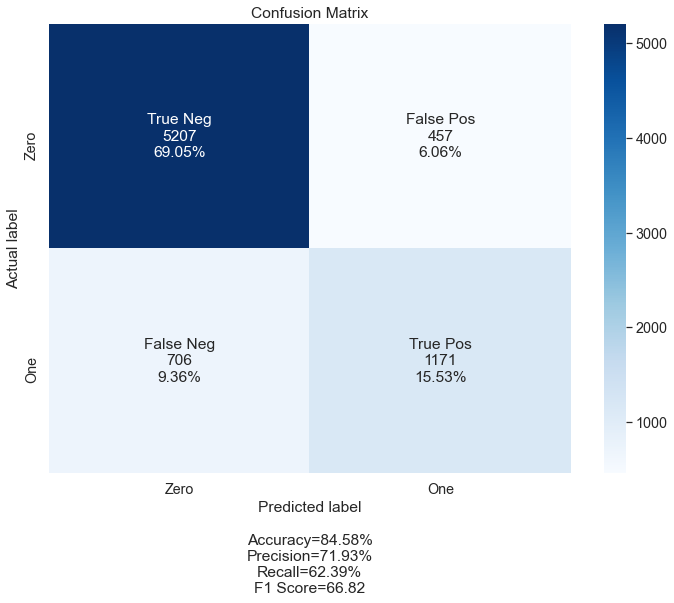

In [103]:
y_prediction = knn_clf.predict(X_test)

make_confusion_matrix(y_test, y_prediction, group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos'],
                     categories = ['Zero', 'One'])

In [104]:
knn_auc = roc_auc_score(y_test, y_prediction)

knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, y_prediction)

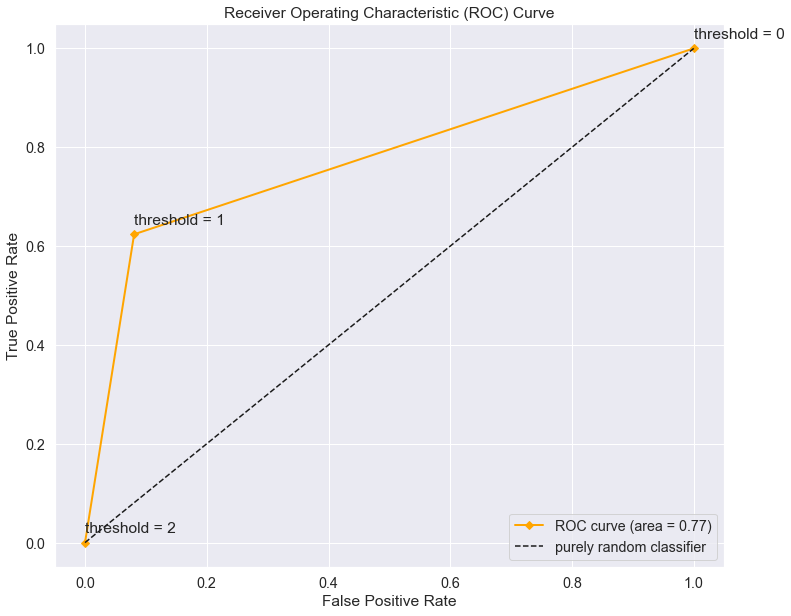

In [105]:
plot_roc_curve(knn_fpr, knn_tpr, knn_thresholds, knn_auc)

In [106]:
#Saving the KNN classifier model

import pickle

with open('C:/Users/saiki/Desktop/AdultCenusIncomePrediction'+ '/KNN.pickle', 'wb') as f:
    pickle.dump(knn_clf,f)

# XGBOOST

In [107]:
# fit model no training data
xgb_model = XGBClassifier(objective='binary:logistic')
xgb_model.fit(X_train, y_train)

C:\Users\saiki\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\saiki\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[14:19:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
y_prediction = xgb_model.predict(X_test)

print("XGB model accuracy(in %): {:.2f}%" .format(metrics.accuracy_score(y_test, y_prediction)*100))

XGB model accuracy(in %): 87.42%


##### Fine tuning the model 

In [109]:
param_grid={'learning_rate':[1,0.5,0.1,0.01], 'max_depth': [6,10,20], 'n_estimators':[5, 10, 25,50]}

gridsearch= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3, cv=5)

In [110]:
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] learning_rate=1, max_depth=6, n_estimators=5 ....................
[14:20:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=6, n_estimators=5, score=0.858, total=   0.1s
[CV] learning_rate=1, max_depth=6, n_estimators=5 ....................
[14:20:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=6, n_estimators=5, score=0.857, total=   0.1s
[CV] learning_rate

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\saiki\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\saiki\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s



[CV]  learning_rate=1, max_depth=6, n_estimators=5, score=0.865, total=   0.1s
[CV] learning_rate=1, max_depth=6, n_estimators=5 ....................
[14:20:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=6, n_estimators=5, score=0.855, total=   0.1s
[CV] learning_rate=1, max_depth=6, n_estimators=5 ....................
[14:20:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=6, n_estimators=5, score=0.868, total=   0.1s


[CV]  learning_rate=1, max_depth=10, n_estimators=5, score=0.857, total=   0.1s
[CV] learning_rate=1, max_depth=10, n_estimators=5 ...................
[14:20:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=10, n_estimators=5, score=0.859, total=   0.1s
[CV] learning_rate=1, max_depth=10, n_estimators=5 ...................
[14:20:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=10, n_estimators=5, score=0.857, total=   0.1

[CV]  learning_rate=1, max_depth=10, n_estimators=50, score=0.844, total=   0.8s
[CV] learning_rate=1, max_depth=20, n_estimators=5 ...................
[14:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=20, n_estimators=5, score=0.852, total=   0.2s
[CV] learning_rate=1, max_depth=20, n_estimators=5 ...................
[14:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=20, n_estimators=5, score=0.849, total=   0.

[CV]  learning_rate=1, max_depth=20, n_estimators=50, score=0.837, total=   1.8s
[CV] learning_rate=1, max_depth=20, n_estimators=50 ..................
[14:20:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=20, n_estimators=50, score=0.839, total=   1.7s
[CV] learning_rate=1, max_depth=20, n_estimators=50 ..................
[14:20:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=1, max_depth=20, n_estimators=50, score=0.836, total=   

[CV]  learning_rate=0.5, max_depth=6, n_estimators=50, score=0.865, total=   0.5s
[CV] learning_rate=0.5, max_depth=6, n_estimators=50 .................
[14:20:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=6, n_estimators=50, score=0.866, total=   0.5s
[CV] learning_rate=0.5, max_depth=6, n_estimators=50 .................
[14:20:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=6, n_estimators=50, score=0.863, total=

[CV]  learning_rate=0.5, max_depth=10, n_estimators=25, score=0.855, total=   0.4s
[CV] learning_rate=0.5, max_depth=10, n_estimators=25 ................
[14:20:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=10, n_estimators=25, score=0.864, total=   0.4s
[CV] learning_rate=0.5, max_depth=10, n_estimators=50 ................
[14:20:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=10, n_estimators=50, score=0.855, tot

[CV]  learning_rate=0.5, max_depth=20, n_estimators=25, score=0.847, total=   1.2s
[CV] learning_rate=0.5, max_depth=20, n_estimators=25 ................
[14:20:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=20, n_estimators=25, score=0.851, total=   1.3s
[CV] learning_rate=0.5, max_depth=20, n_estimators=25 ................
[14:20:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.5, max_depth=20, n_estimators=25, score=0.847, tot

[14:21:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=6, n_estimators=25, score=0.856, total=   0.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=25 .................
[14:21:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=6, n_estimators=25, score=0.855, total=   0.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=25 .................
[14:21:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release

[CV]  learning_rate=0.1, max_depth=10, n_estimators=10, score=0.855, total=   0.3s
[CV] learning_rate=0.1, max_depth=10, n_estimators=10 ................
[14:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=10, score=0.856, total=   0.3s
[CV] learning_rate=0.1, max_depth=10, n_estimators=25 ................
[14:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=25, score=0.859, tot

[CV]  learning_rate=0.1, max_depth=20, n_estimators=10, score=0.853, total=   0.4s
[CV] learning_rate=0.1, max_depth=20, n_estimators=10 ................
[14:21:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=20, n_estimators=10, score=0.853, total=   0.4s
[CV] learning_rate=0.1, max_depth=20, n_estimators=10 ................
[14:21:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, max_depth=20, n_estimators=10, score=0.845, tot

[CV]  learning_rate=0.01, max_depth=6, n_estimators=10, score=0.843, total=   0.2s
[CV] learning_rate=0.01, max_depth=6, n_estimators=10 ................
[14:21:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=6, n_estimators=10, score=0.847, total=   0.2s
[CV] learning_rate=0.01, max_depth=6, n_estimators=10 ................
[14:21:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=6, n_estimators=10, score=0.851, tot

[14:21:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=10, n_estimators=5, score=0.854, total=   0.1s
[CV] learning_rate=0.01, max_depth=10, n_estimators=10 ...............
[14:21:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=10, n_estimators=10, score=0.848, total=   0.3s
[CV] learning_rate=0.01, max_depth=10, n_estimators=10 ...............
[14:21:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV]  learning_rate=0.01, max_depth=20, n_estimators=5, score=0.844, total=   0.2s
[CV] learning_rate=0.01, max_depth=20, n_estimators=5 ................
[14:22:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=20, n_estimators=5, score=0.849, total=   0.2s
[CV] learning_rate=0.01, max_depth=20, n_estimators=5 ................
[14:22:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.01, max_depth=20, n_estimators=5, score=0.840, tot

[CV]  learning_rate=0.01, max_depth=20, n_estimators=50, score=0.850, total=   1.8s
[14:22:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  2.1min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [111]:
gridsearch.best_params_

{'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 25}

In [112]:
gridsearch.best_score_

0.8657000747395107

In [113]:
xgb_model=XGBClassifier(learning_rate= 0.5, max_depth= 6, n_estimators= 25)
xgb_model.fit(X_train, y_train)

[14:51:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=25, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [114]:
print("XGBClassifier model accuracy(in %): {:.2f}%" .format(xgb_model.score(X_test,y_test)*100))

XGBClassifier model accuracy(in %): 87.36%


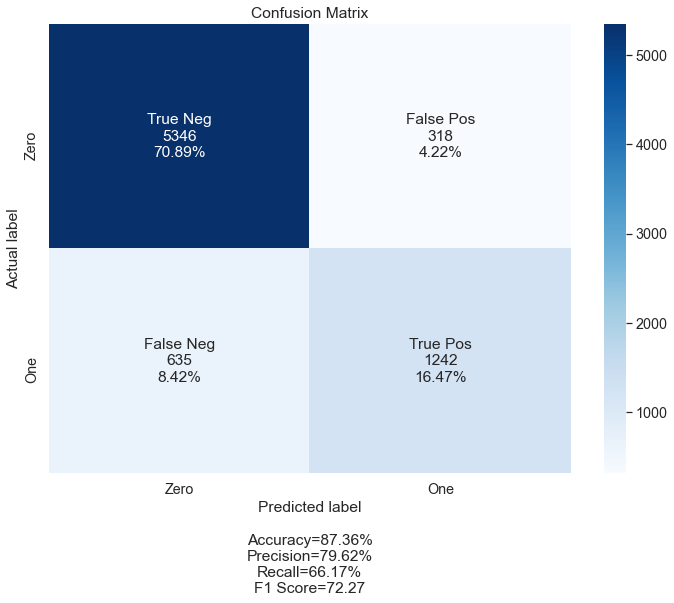

In [115]:
y_prediction = xgb_model.predict(X_test)

make_confusion_matrix(y_test, y_prediction, group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos'],
                     categories = ['Zero', 'One'])

In [116]:
xgb_auc = roc_auc_score(y_test, y_prediction)

xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, y_prediction)

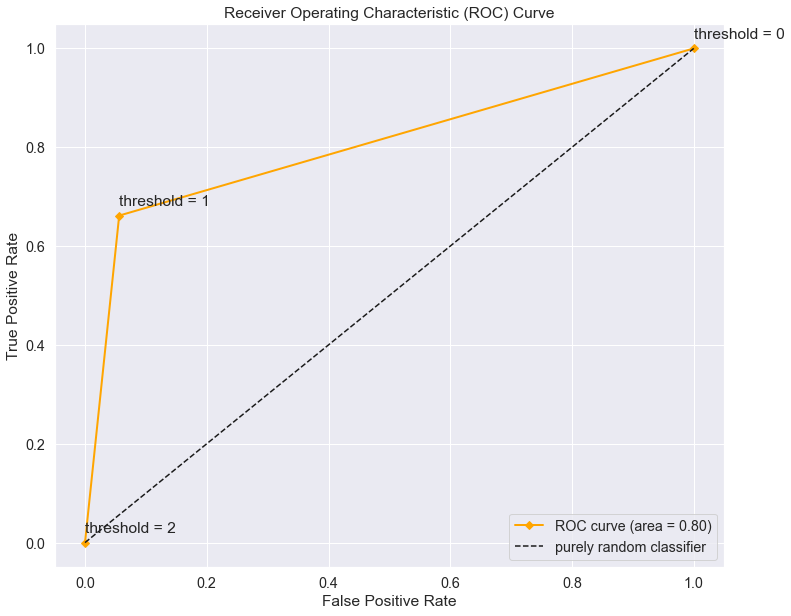

In [117]:
plot_roc_curve(xgb_fpr, xgb_tpr, xgb_thresholds, xgb_auc)

In [118]:
#Saving the XGBclassifier model

import pickle

with open('C:/Users/saiki/Desktop/AdultCenusIncomePrediction'+ '/xgb.pickle', 'wb') as f:
    pickle.dump(xgb_model,f)

## Model Selection

After hyperparamter tuning all the models, xgboost model was performing the best. The Accuracy was 87.36%, Precision 79.62%, Recall 66.17% and F1 Score is 72.27. It is the highest among all the models. The ROC curve are is 0.80 which is the highest among all the models. Thus we can choose XGBoost as the final model for prediction and we will be using it for deployment.